**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Comentario de ejemplo
</div>

Proyecto Integrado 1  
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.  
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.  
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

En este proyecto veremos puntos como:
* Corrección de datos
* Valores ausentes
* Analisis/procesamiento de datos 
* Analisis estadistico/exploratorio

El principal objetivo es realizar una conclusion sobre cual seria la mejor opcion/estrategia a realizar para las ventas de los videojuegos del año 2017

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
Puedes expandir un poco más la introducción, como tabla de contenido del proyecto y cual es el objetivo principal. </div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo!
</div>

## Inicio

### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nd
import math as mt
from scipy import stats as st

### Datos

In [2]:
df = pd.read_csv('/datasets/games.csv')

### Información general

Descripcion de los datos:  
* **Name** - (Nombre)  
* **Platform** - (Plataforma)  
* **Year_of_Release** - (Año de lanzamiento)  
* **Genre** - (Género)  
* **NA_sales** - (ventas en Norteamérica en millones de dólares estadounidenses)  
* **EU_sales** - (ventas en Europa en millones de dólares estadounidenses)  
* **JP_sales** - (ventas en Japón en millones de dólares estadounidenses)  
* **Other_sales** - (ventas en otros países en millones de dólares estadounidenses)  
* **Critic_Score** - (máximo de 100)  
* **User_Score** - (máximo de 10)  
* **Rating** - clasificación (ESRB)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Observaciónes y conclusiones:**  
1. Columnas en mayusculas y minusculas  
2. Columna year_of_release como float, la cambiaremos a int  
3. Columnas con valores ausentes como: **year_of_release, name, genre, critic_score, user_score, rating**  
4. Verificaremos que no haya duplicados  
5. Rellenaremos los valores ausentes de year of release de acuerdo a otro juego parecido  
6. Podemos rellenar los valores ausentes de critic score, user score y rating con un promedio para el caso de score, o podemos rellenar los datos con un titulo del mismo nombre para otra consola, ya que se tiende a tener la misma calificacion para todas las consolas y el mismo rating.  
7. Podemos Homologar el critic y user score para que sea mas facil representar los datos, es decir, que se midan de 0 a 100 o de 0 a 10. 
8. Verificaremos los valores unicos de name para ver que no esten mal escritos y/o homologarlos con sus los titulos de diferentes consolas. 
9. User score esta como object, cambiaremos a float

## Correccion de datos

**Valores ausentes**

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

###  Modificacion de titulos de mayusculas a minusculas

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df = df.rename(columns = {
'Name':'name',
'Platform':'platform',
'Year_of_Release':'year_of_release',
'Genre':'genre',
'NA_sales':'na_sales',
'EU_sales':'eu_sales',
'JP_sales':'jp_sales',
'Other_sales':'other_sales',
'Critic_Score':'critic_score',
'User_Score':'user_score',
'Rating':'rating',
})

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Rellenar valores ausentes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Columna "name"

Verificamos los valores ausentes de la columna name

In [10]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df[(df['platform'] == 'GEN') & (df['year_of_release'] == 1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# Ya que solo tenemos dos datos ausentes en la columna name y genre llenaremos los datos con el valor unknown, ya que 
# aunque no sabremos el nombre, representaron ventas en una categoria en especifica
df.dropna(subset=['name','genre'],inplace=True)

In [13]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo con la exploración inicial!
</div>

#### Columna "year_of_release"

Para los valores ausentes en la columna de year_of_release vemos que tenemos varios titulos con el mismo nombre pero de diferente plataforma, al no saber en que fecha se estrenaron los juegos para las diferentes plataformas en el caso de los valores ausentes, usaremos:
* El año mas antiguo para el titulo, es decir, un estreno simultaneo del mismo juego en diferentes plataformas, por lo que primero determinaremos el año de estreno mas antiguo para cada juego
* Despues en caso de que el titulo sea exclusivo para una plataforma y no tengamos una referencia, usaremos la mediana de años entre los titulos de cada plataforma.

In [14]:
# Vemos que varios titulos estan repetidos, esto quiere decir: que son multiplaforma o hay registros repetidos, seguiremos con
# las instrucciones de arriba
df['name'].value_counts()

Need for Speed: Most Wanted          12
Ratatouille                           9
LEGO Marvel Super Heroes              9
FIFA 14                               9
Madden NFL 07                         9
                                     ..
Danball Senki                         1
Mark Davis Pro Bass Challenge         1
Nostalgia                             1
Akatsuki no Amaneka to Aoi Kyojin     1
City Life: World Edition              1
Name: name, Length: 11559, dtype: int64

In [15]:
# Mediana por plataforma
df.groupby('platform')['year_of_release'].median()

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

Definimos tres funciones que nos ayudaran a reemplazar los valores ausentes

In [16]:
def fill_columns_median(data,col_base,col_compare):
# Asignamnos una tabla para obtener solo los valores de la columna a comparar     
    list1 = data[[col_base,col_compare]] 
    list_unique = list1[col_base].unique()
# Asignaremos un valor unico de fecha de salida, al no saber cual es, utilizaremos el año minimo de
# lanzamiento de cada juego, primero realizaremos un diccionario para relacionar el titulo con el año
# de lanzamiento    
    dic_list = {}
    for x in list_unique:
        y = data.loc[data[col_base] == x,col_compare].median() # operacion matematica a realizar
        dic_list[x] = y
# Reemplazamos los valores ausentes con 'replace'        
    data[col_compare] = data[col_compare].fillna(0)
# Cambiamos estos valores por el valor comparado    
    for i in range(len(data)):
        if data.loc[i,col_compare] == 0:
            col = data.loc[i,col_compare] = dic_list[data.loc[i,col_base]]

In [17]:
def fill_columns_mean(data,col_base,col_compare):
    list1 = data[[col_base,col_compare]]
    list_unique = list1[col_base].unique()
    dic_list = {}
    for x in list_unique:
        y = data.loc[data[col_base] == x,col_compare].mean()
        dic_list[x] = y
    data[col_compare] = data[col_compare].fillna(0)
    for i in range(len(data)):
        if data.loc[i,col_compare] == 0:
            col = data.loc[i,col_compare] = dic_list[data.loc[i,col_base]]

In [18]:
def fill_columns_min(data,col_base,col_compare):
    list1 = data[[col_base,col_compare]] 
    list_unique = list1[col_base].unique()
    dic_list = {}
    for x in list_unique:
        y = data.loc[data[col_base] == x,col_compare].min()
        dic_list[x] = y
    data[col_compare] = data[col_compare].fillna(0)
    for i in range(len(data)):
        if data.loc[i,col_compare] == 0:
            col = data.loc[i,col_compare] = dic_list[data.loc[i,col_base]]

In [19]:
# Aplicamos la funcion para rellenar los datos para los juegos existentes multiplataforma con el año mas antiguo de estreno
fill_columns_min(df,'name','year_of_release')

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

De acuerdo con está aproximación de `year_of_release`.
</div>

In [20]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ya rellenamos los juegos con sus homologos de diferentes consolas con el año del juego que se estreno primero pero aun tenemos valores ausentes, rellenaremos con los valores restantes con la mediana de los titulos de acuerdo a los años de titulos estrenados por plataforma.

In [21]:
df.year_of_release = df.year_of_release.fillna(0)

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido, rellenamos valores con el valor 0 y los excluiremos mas adelante en el analisis estadistico
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Aquí ya no existe relación causal y cuando hagas pruebas estádisticas tus análisis se veran fuertemente afectados. Puedes dejarlos como valores nulos, no siempre imputar datos es la mejor manera de abordar los ausentes.
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo!
</div>

In [22]:
# Corregimos el tipo de datos en la columna year_of_release
df.year_of_release = df.year_of_release.astype('int')

In [23]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Ya tenemos los valores de los años, ahora repetiremos el proceso para las columnas de **critic_score**, **user_score**, primero compararemos con los valores de su mismo juegos en sus diferentes consolas, y si aun persisten valores ausentes, los reemplazaremos con el promedio de los juegos de esa consola.

#### Columna "critic_score"

In [24]:
#Verificamos que el promedio de critica por plataforma
df.groupby('platform')['critic_score'].mean()

platform
2600          NaN
3DO           NaN
3DS     67.101190
DC      87.357143
DS      63.761506
GB            NaN
GBA     67.372146
GC      69.488839
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PC      75.928671
PCFX          NaN
PS      71.515000
PS2     68.727273
PS3     70.382927
PS4     72.091270
PSP     67.424242
PSV     70.791667
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii     62.823932
WiiU    70.733333
X360    68.616812
XB      69.859310
XOne    73.325444
Name: critic_score, dtype: float64

In [25]:
# Verificamos un segmento de los datos
df[df.platform == '3DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16646,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16651,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16666,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16675,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [26]:
# Columna critic score contienen valores ausentes y flotantes, rellenaremos primero datos que esten ausentes y sean 
# multiplataforma
fill_columns_mean(df,'name','critic_score')

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo!
</div>

In [27]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [28]:
# Aplicamos la funcion para rellenar los valores faltantes con la media de las criticas de plataforma
fill_columns_mean(df,'platform','critic_score')

In [29]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16682 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [30]:
# Verificamos los datos ausentes restantes
df[df.critic_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1262,Sonic CD,SCD,1993,Platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN
3925,Final Fantasy,WS,2000,Role-Playing,0.0,0.00,0.51,0.00,NaN,NaN,NaN
6109,Digimon Adventure: Anode Tamer,WS,1999,Role-Playing,0.0,0.00,0.28,0.00,NaN,NaN,NaN
6649,Final Fantasy II,WS,2001,Role-Playing,0.0,0.00,0.25,0.00,NaN,NaN,NaN
6662,Samurai Shodown II,NG,1994,Fighting,0.0,0.00,0.25,0.00,NaN,NaN,NaN
7016,The King of Fighters '95 (CD),NG,1994,Fighting,0.0,0.00,0.23,0.00,NaN,NaN,NaN
7498,The King of Fighters '95,NG,1995,Fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
7541,Samurai Spirits (CD),NG,1994,Fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
8038,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999,Role-Playing,0.0,0.00,0.18,0.00,NaN,NaN,NaN
8293,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000,Strategy,0.0,0.00,0.17,0.00,NaN,NaN,NaN


Tenemos datos de los cuales no tenemos ninguna referencia, tanto de titulos como de consola, llenaremos estos valores con 0.  
Esto puede deberse a que estos titulos no tuvieron alguna critica o no fueron lo suficientemenete populares para realizarles una critica, de igual forma podemos ver que la mayoria son del año 2000 hacia atras, por lo que puede ser que no recibieran criticas en su momento.

In [31]:
df.critic_score = df.critic_score.fillna(0)

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy de acuerdo con el rellenado de valores 0 siempre y cuando lo tengas en cuenta más adelante para no incluirlos.
</div>

In [32]:
# Verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


####  Columna "user_score"

Tenemos el concepto **TBD (to be determined)** el cual nos afecta para calculos en la lista ya que al ser valores numericos y tener TBD se convierte la lista en tipo object, realizaremos otra columna para conservar este dato en su columna original, y en la nueva le daremos valor de 0, con esto podremos hacer las conversiones de tipo de dato a float y rellenar sus valores ausentes como en los pasos anteriores

In [33]:
# Creamos la nueva columna
df['user_score2'] = df['user_score']
# Cambiamos el valor tbt a 0
df.loc[df['user_score2'] == 'tbd', 'user_score2'] = 0
# Corregimos el tipo de datos en la columna year_of_release
df.user_score2 = df.user_score2.astype('float')

In [34]:
#Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  user_score2      10014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [35]:
# rellenamos la columna user_score2 con el promedio de los titulos multiplaforma
fill_columns_mean(df,'name','user_score2')

In [36]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  user_score2      10443 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [37]:
# Rellenamos la columna user_score2 con el valor 0 
df.user_score2 = df.user_score2.fillna(0)

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido, rellenamos valores con el valor 0 y los excluiremos mas adelante en el analisis estadistico y se elimino una linea de codigo adelante ya que realizaba la misma operación
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Debes tener cuidado en este paso, ya que no existe relación causal para poder imputar los datos de está forma.</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo!
</div>

Tenemos datos de los cuales no tenemos ninguna referencia, tanto de titulos como de consola, llenaremos estos valores con 0.  
Esto puede deberse a que estos titulos no tuvieron alguna critica o no fueron lo suficientemenete populares para realizarles una critica, de igual forma podemos ver que la mayoria son del año 2000 hacia atras, por lo que puede ser que no recibieran criticas en su momento.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy de acuerdo con el rellenado de valores 0 siempre y cuando lo tengas en cuenta más adelante para no incluirlos.
</div>

####  Columna "ratings"

In [38]:
# Verificamos los valores de ratings
df.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Para rellenar los valores ausentes y para tener una mayor vision, veremos por genero que ratings contienen y cual es el mas popular para poder llenar los valores ausentes de acuerdo a: **el genero con su rating mas popular.**

In [39]:
ratings = df.pivot_table(index=['genre','rating'],values='name',aggfunc='count').reset_index()
display(ratings)

,genre,rating,name
0,Action,AO,1
1,Action,E,416
2,Action,E10+,481
3,Action,EC,1
4,Action,M,608
5,Action,T,681
6,Adventure,E,162
7,Adventure,E10+,68
8,Adventure,EC,2
9,Adventure,M,99


Ahora solo dejaremos el genero con su rating mas popular

In [40]:
# Ordenamos la tabla de acuerdo al nombre de forma descendente
ratings.sort_values(by='name',ascending=False, inplace=True)
# Eliminamos duplicados y conservamos el primer valor, osea, el mayor o mas popular
ratings.drop_duplicates(subset='genre',keep='first',inplace=True)
# Hacemos nuestra lista de valores unicos
rt = ratings['genre'].unique()
# Reseteamos el indice de la tabla
ratings.set_index('genre',inplace=True)

In [41]:
# Generamos nuestro diccionario para almacenar los valores de genero con su rating mas poupular
genre_list = {}
for x in rt:
    y = ratings.loc[x,'rating']
    genre_list[x] = y
# Rellenamos los valores ausentes de acuerdo a nuestro criterio
df['rating'] = df['rating'].fillna('replace')
for i in range(len(df)):
    if df.loc[i,'rating'] == 'replace':
        df.loc[i,'rating'] = genre_list[df.loc[i,'genre']]

In [42]:
# Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  user_score2      16713 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Utilizaremos el mismo metodo para llenar las columnas de critic_score, user_score y rating, bien podriamos relacionar el promedio de cada juego con el valor ausente, muchas veces el mismo juego en diferente plataforma puede tener un valor distinto, es decir, los juegos de consola tienden a tener una valoracion mas alta que los juegos de consola portatil, aun siendo el mismo titulo, por lo que un promedio por plataforma seria lo mas adecuado.

### Valores duplicados 

In [43]:
# Veamos su hay filas duplicadas
df.duplicated().sum()

0

No tenemos valores duplicados, veamos los valores unicos de las columnas

In [44]:
# Definimos nuestra funcion
def dup_values(data,column):
    return data[column].value_counts()


In [45]:
dup_values(df,'name')

Need for Speed: Most Wanted          12
Ratatouille                           9
LEGO Marvel Super Heroes              9
FIFA 14                               9
Madden NFL 07                         9
                                     ..
Danball Senki                         1
Mark Davis Pro Bass Challenge         1
Nostalgia                             1
Akatsuki no Amaneka to Aoi Kyojin     1
City Life: World Edition              1
Name: name, Length: 11559, dtype: int64

Tenemos varios conteos para un unico valor veamos de que trata con los dos primeros titulos

In [46]:
df[df.name == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score2
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,9.100000
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,77.5,NaN,E,8.377778
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,8.500000
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,8.500000
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,8.800000
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,77.5,NaN,E,8.377778
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,9.100000
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,8.500000
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,77.5,NaN,E,8.377778
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,6.100000


In [47]:
df[df.name == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score2
1597,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,61.0,NaN,T,5.0125
2441,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8,E,8.0000
3068,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,7.1000
3901,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,4.8000
3947,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,6.7000
6397,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,tbd,E,5.0125
7680,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,tbd,E,5.0125
9014,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,5.6000
14512,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,61.0,7.9,E,7.9000


Podemos observar que podemos tener valores duplicados con un titulo y misma consola, es decir, un doble registro, esto pudo ser causado por un error humano, lo que haremos será:
* Una tabla con el titulo con su plataforma y la suma de las ventas en caso de que exista un doble registro, asi tendremos un registro con el total de ventas.
* Una tabla con el titulo y su plataforma y los valores cualitativos de los titulos es decir una tabla dinamica con la funcion "first".     

Despues uniremos las tablas con el metodo merge para tener un registro unico sin valores duplicados.

In [48]:
table1 = df.pivot_table(index=['name','platform'],values=['eu_sales','jp_sales','na_sales','other_sales'],aggfunc='sum').reset_index()
display(table1)

,name,platform,eu_sales,jp_sales,na_sales,other_sales
0,Beyblade Burst,3DS,0.00,0.03,0.00,0.00
1,Fire Emblem Fates,3DS,0.23,0.52,0.81,0.11
2,Frozen: Olaf's Quest,3DS,0.27,0.00,0.27,0.05
3,Frozen: Olaf's Quest,DS,0.26,0.00,0.21,0.04
4,Haikyu!! Cross Team Match!,3DS,0.00,0.04,0.00,0.00
...,...,...,...,...,...,...
16704,uDraw Studio,Wii,0.57,0.00,1.65,0.20
16705,uDraw Studio: Instant Artist,Wii,0.09,0.00,0.06,0.02
16706,uDraw Studio: Instant Artist,X360,0.01,0.00,0.01,0.00
16707,wwe Smackdown vs. Raw 2006,PS2,1.02,0.00,1.57,0.41


In [49]:
table2 = df.pivot_table(index=['name','platform'],values=['year_of_release','genre','critic_score','user_score','rating','user_score2'],aggfunc='first').reset_index()
display(table2)

,name,platform,critic_score,genre,rating,user_score,user_score2,year_of_release
0,Beyblade Burst,3DS,67.675743,Role-Playing,T,None,0.00,2016
1,Fire Emblem Fates,3DS,67.675743,Role-Playing,T,None,0.00,2015
2,Frozen: Olaf's Quest,3DS,67.675743,Platform,E,None,0.00,2013
3,Frozen: Olaf's Quest,DS,63.061675,Platform,E,None,0.00,2013
4,Haikyu!! Cross Team Match!,3DS,67.675743,Adventure,E,None,0.00,2016
...,...,...,...,...,...,...,...,...
16704,uDraw Studio,Wii,71.000000,Misc,E,tbd,0.00,2010
16705,uDraw Studio: Instant Artist,Wii,54.000000,Misc,E,tbd,2.85,2011
16706,uDraw Studio: Instant Artist,X360,54.000000,Misc,E,5.7,5.70,2011
16707,wwe Smackdown vs. Raw 2006,PS2,68.341218,Fighting,T,None,0.00,0


Vemos que ya nos cuadran los datos y se redujeron solo 4 filas al valor anterior, sin embargo, para fines practicos y en caso de que en el futuro tengamos que repetir el proceso o se agregue informacion y llegue a suceder el mismo error de duplicar un registro ya tendremos la solución. 

In [50]:
df2 = table1.merge(table2,on=['name','platform'],how='right')

In [51]:
df2

,name,platform,eu_sales,jp_sales,na_sales,other_sales,critic_score,genre,rating,user_score,user_score2,year_of_release
0,Beyblade Burst,3DS,0.00,0.03,0.00,0.00,67.675743,Role-Playing,T,None,0.00,2016
1,Fire Emblem Fates,3DS,0.23,0.52,0.81,0.11,67.675743,Role-Playing,T,None,0.00,2015
2,Frozen: Olaf's Quest,3DS,0.27,0.00,0.27,0.05,67.675743,Platform,E,None,0.00,2013
3,Frozen: Olaf's Quest,DS,0.26,0.00,0.21,0.04,63.061675,Platform,E,None,0.00,2013
4,Haikyu!! Cross Team Match!,3DS,0.00,0.04,0.00,0.00,67.675743,Adventure,E,None,0.00,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,uDraw Studio,Wii,0.57,0.00,1.65,0.20,71.000000,Misc,E,tbd,0.00,2010
16705,uDraw Studio: Instant Artist,Wii,0.09,0.00,0.06,0.02,54.000000,Misc,E,tbd,2.85,2011
16706,uDraw Studio: Instant Artist,X360,0.01,0.00,0.01,0.00,54.000000,Misc,E,5.7,5.70,2011
16707,wwe Smackdown vs. Raw 2006,PS2,1.02,0.00,1.57,0.41,68.341218,Fighting,T,None,0.00,0


Listo, ya tenemos nuestra tabla corregida para valores duplicados, procederemos a calcular la columna con las ventas totales por titulo en su respectiva consola.

### Ventas totales

In [52]:
def total_sales(row):
    total_sales = row['eu_sales'] + row['jp_sales'] + row['na_sales'] + row['other_sales']
    return total_sales

In [53]:
# Aplicamos la funcion a nuestro dataframe corregido
df2['total_sales'] = df2.apply(total_sales,axis=1)

In [54]:
df2

,name,platform,eu_sales,jp_sales,na_sales,other_sales,critic_score,genre,rating,user_score,user_score2,year_of_release,total_sales
0,Beyblade Burst,3DS,0.00,0.03,0.00,0.00,67.675743,Role-Playing,T,None,0.00,2016,0.03
1,Fire Emblem Fates,3DS,0.23,0.52,0.81,0.11,67.675743,Role-Playing,T,None,0.00,2015,1.67
2,Frozen: Olaf's Quest,3DS,0.27,0.00,0.27,0.05,67.675743,Platform,E,None,0.00,2013,0.59
3,Frozen: Olaf's Quest,DS,0.26,0.00,0.21,0.04,63.061675,Platform,E,None,0.00,2013,0.51
4,Haikyu!! Cross Team Match!,3DS,0.00,0.04,0.00,0.00,67.675743,Adventure,E,None,0.00,2016,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,uDraw Studio,Wii,0.57,0.00,1.65,0.20,71.000000,Misc,E,tbd,0.00,2010,2.42
16705,uDraw Studio: Instant Artist,Wii,0.09,0.00,0.06,0.02,54.000000,Misc,E,tbd,2.85,2011,0.17
16706,uDraw Studio: Instant Artist,X360,0.01,0.00,0.01,0.00,54.000000,Misc,E,5.7,5.70,2011,0.02
16707,wwe Smackdown vs. Raw 2006,PS2,1.02,0.00,1.57,0.41,68.341218,Fighting,T,None,0.00,0,3.00


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16708
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   eu_sales         16709 non-null  float64
 3   jp_sales         16709 non-null  float64
 4   na_sales         16709 non-null  float64
 5   other_sales      16709 non-null  float64
 6   critic_score     16709 non-null  float64
 7   genre            16709 non-null  object 
 8   rating           16709 non-null  object 
 9   user_score       10010 non-null  object 
 10  user_score2      16709 non-null  float64
 11  year_of_release  16709 non-null  int64  
 12  total_sales      16709 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


Ya tenemos nuestro dataframe listo para poder analizar los datos y categorias que necesitemos

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

¡Muy buen trabajo en general!
</div>

## Analisis de datos 

###  Juegos lanzados en diferentes años

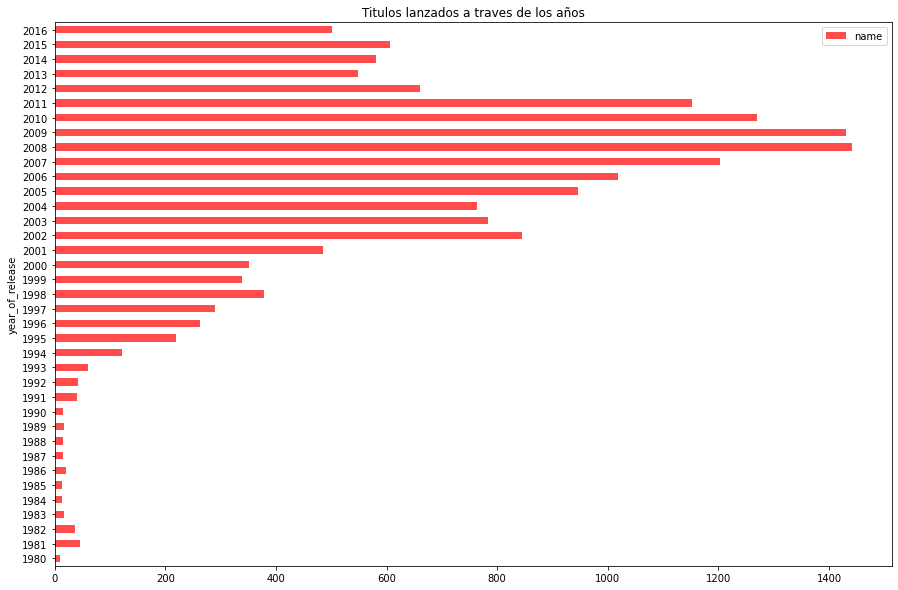

In [56]:
df2.query('year_of_release != 0').pivot_table(index='year_of_release',values='name',aggfunc='count').plot.barh(figsize=(15,10),
                                                                                title= 'Titulos lanzados a traves de los años',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

Podemos observar que la produccion y/o lanzamiento de juegos comianza a ser popular en los años 90 pasando de 25 lanzamientos por año hasta 300 lanzamientos aproximadamente, con un mayor crecimiento y popularidad a partir de los años 2000, los lanzamientos por año comienzan a ser de 800 hasta 1400 titulos por año, siendo el año 2008 y 2009 los años con mas lanzmientos sobrepasando los 1400 titulos.

### Mayores ventas por consola

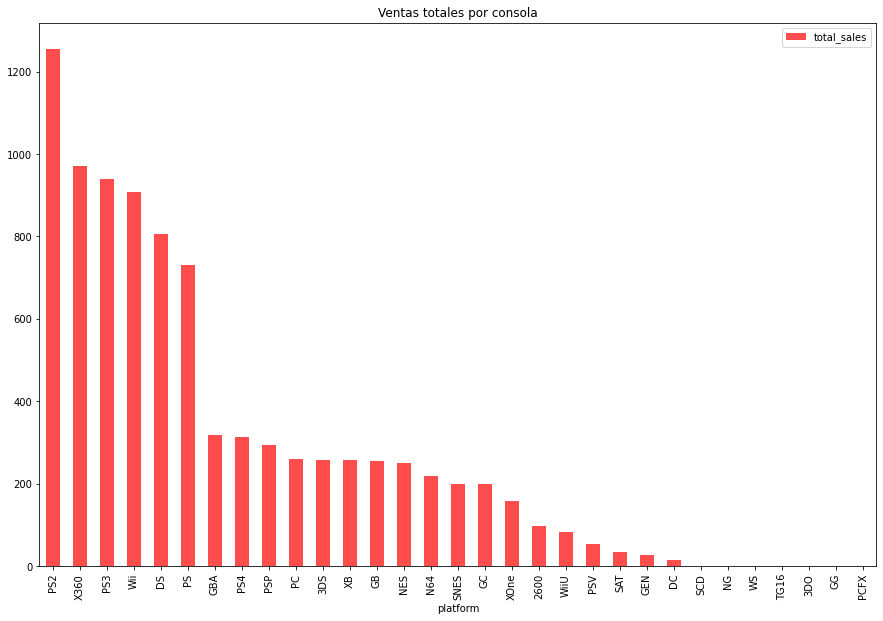

In [57]:
df2.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales por consola',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

Tenemos 6 consolas que se distancian y sobresalen en ventas(**PS2, X360, PS3, Wii, DS, PS**), otorgando ventas de mas de 700 millones de dolares cada una.

In [58]:
def plat_sales_year(platform):
    x = platform
    z = df2.query('platform == @x and year_of_release != 0').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot.bar(figsize=(15,10),
                                                                                color='red',
                                                                                alpha=0.7)
    plt.title(x)
    plt.show()
    return z
most_sales = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

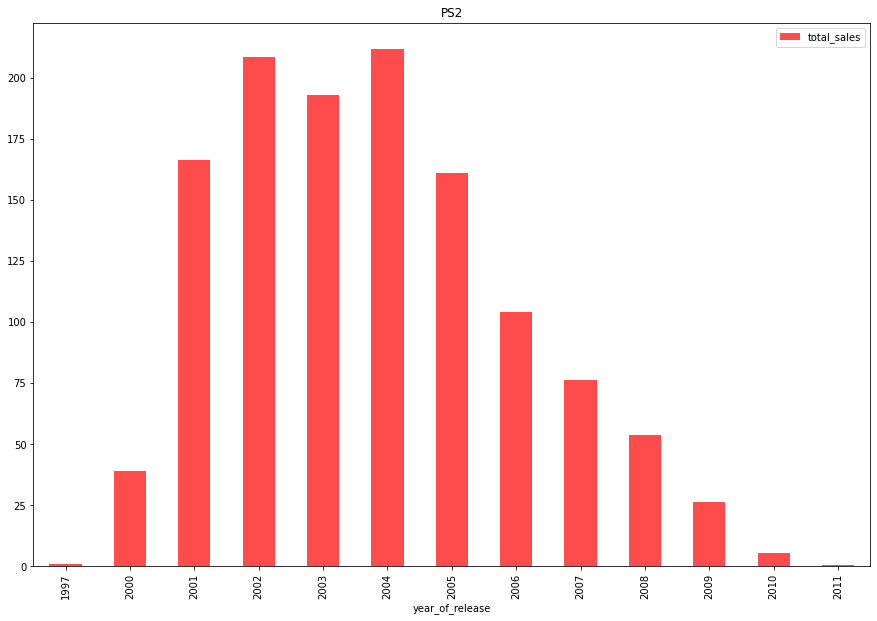

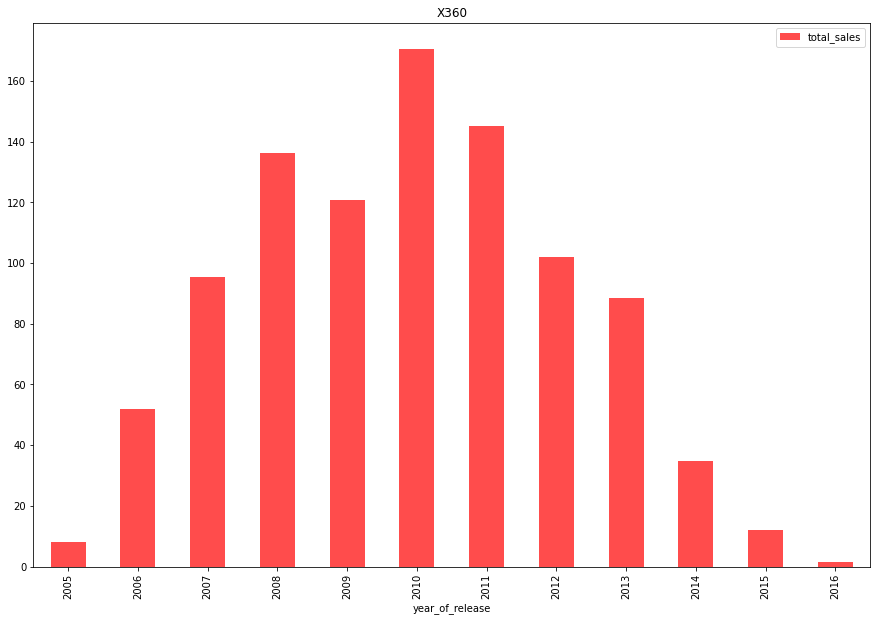

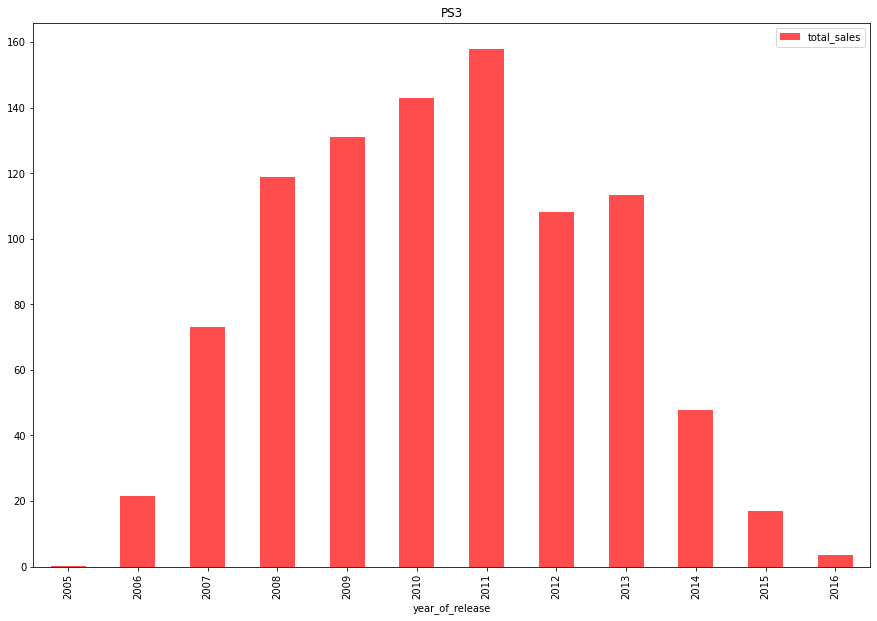

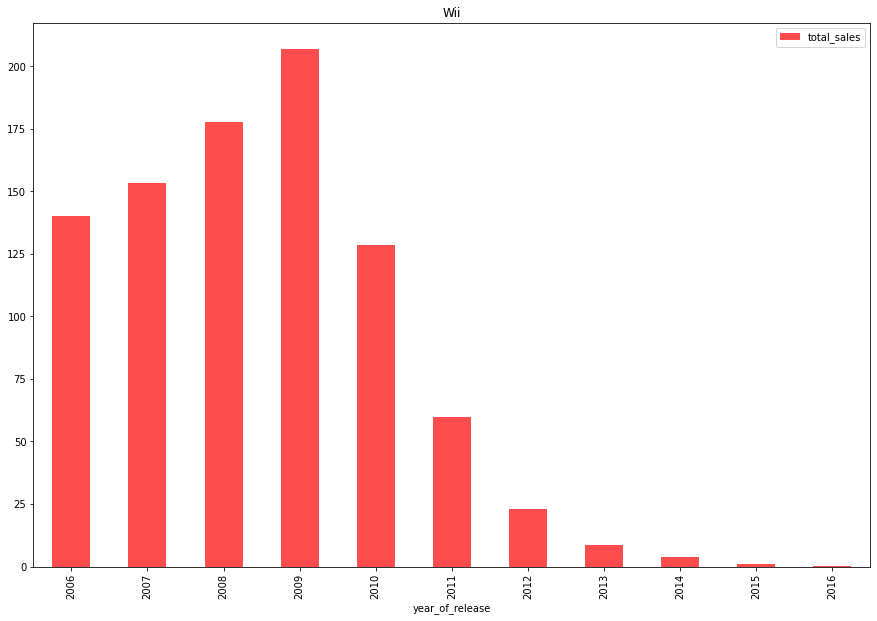

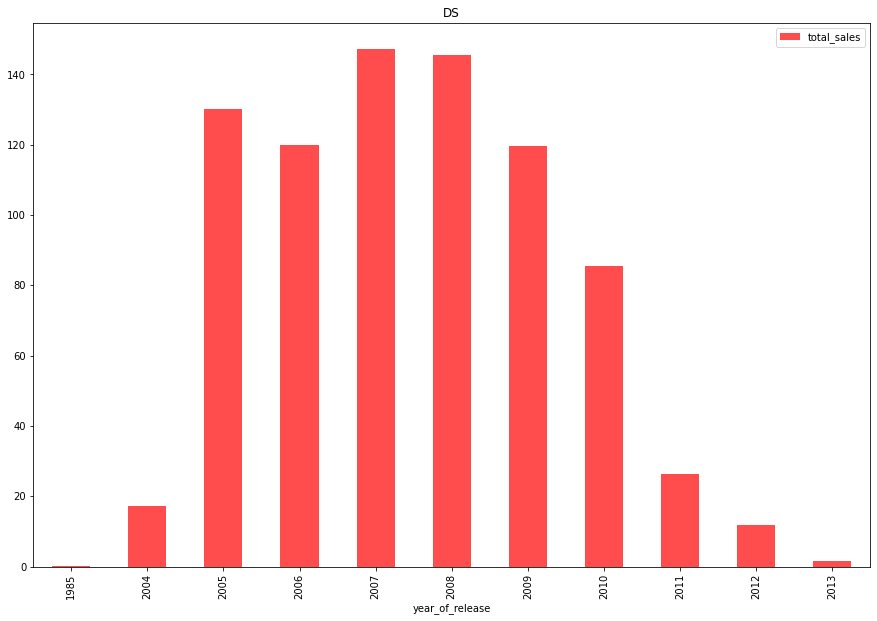

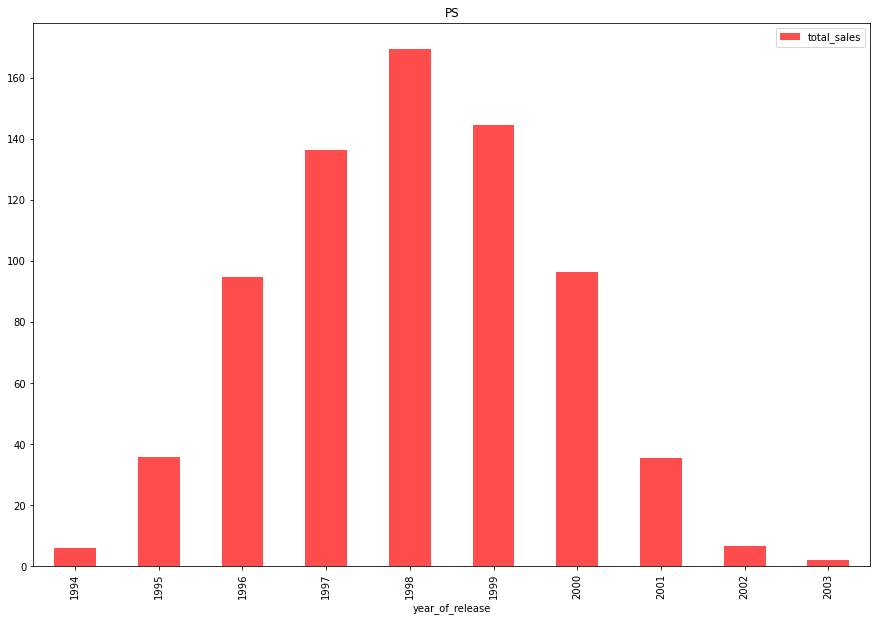

In [59]:
for x in most_sales:
    plat_sales_year(x)

Podemos observar de estas 6 muestras que el tiempo aproximado de "vida" de una consola es de 10 años, teniendo su mayor punto de ventas a la mitad de su vida, a que podria deberse esto?, bueno podemos pensar que de inicio al momento de salida de una consola la mayor parte de la poblacion gamer no puede acceder a una plataforma nueva, ya sea por cuestiones economicas o de disponibilidad, y pasados los años al que la gente ya cuente con una consola se tienen mayores ventas, sin embargo, pasado este pico, comienza a descender su indice de ventas de titulos.

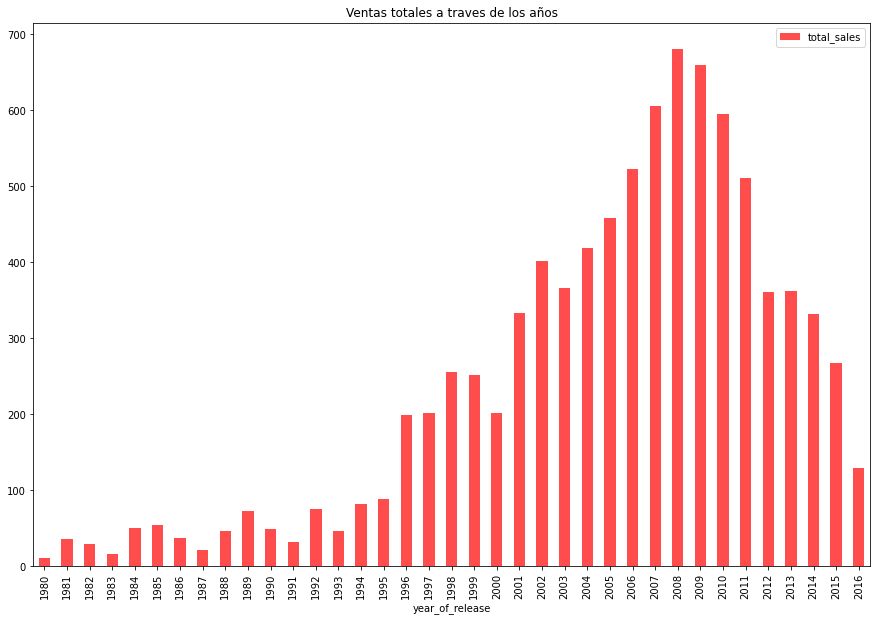

In [60]:
df2.query('year_of_release !=0').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales a traves de los años',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

Con esta grafica de ventas totales podemos obsevar que el pico de ventas de videojuegos fue en el año 2008 y apartir de este año comenzaron a caer las ventas por lo que el panorama para el año 2017 no parece muy prometedor, veamos que consolas se mantienen en el mercado en el año 2006 al año 2016 ya que como vimos es el tiempo de vida promedio de las consolas.

#### Datos del año 2006 a la actualidad

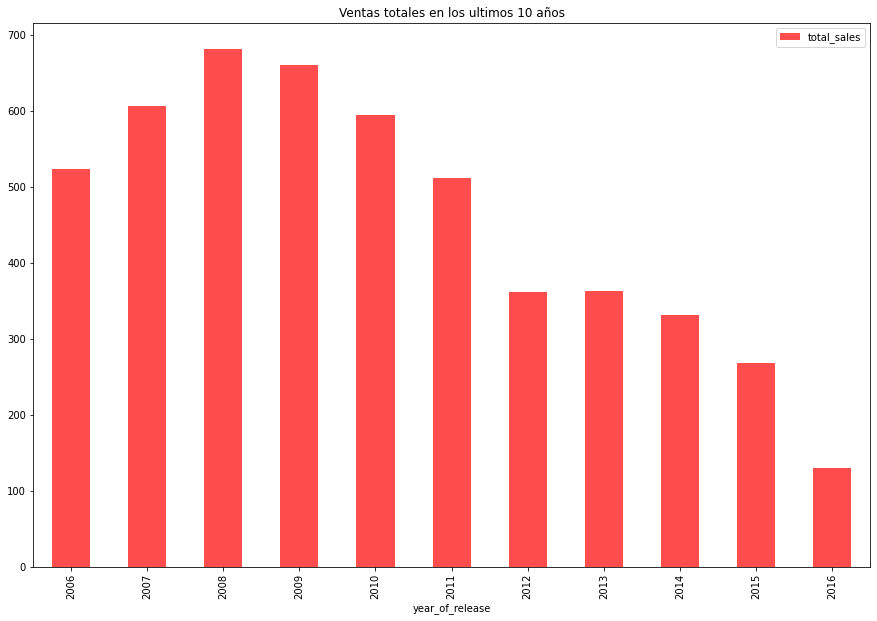

In [61]:
df2.query('year_of_release >= 2006').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales en los ultimos 10 años',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

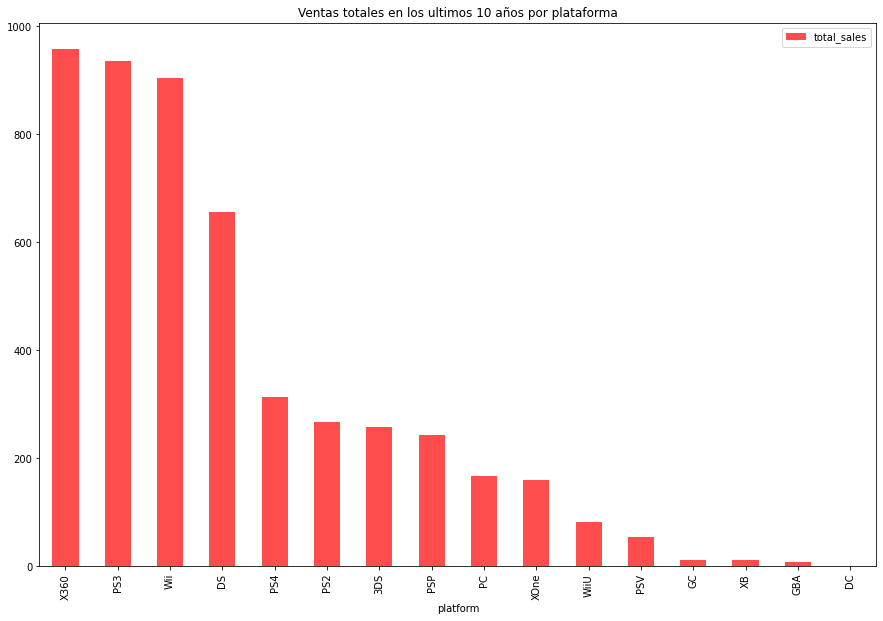

In [62]:
df2.query('year_of_release >= 2006').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales en los ultimos 10 años por plataforma',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

Usaremos las 5 plataformas mas rentables de los ultimos 10 años

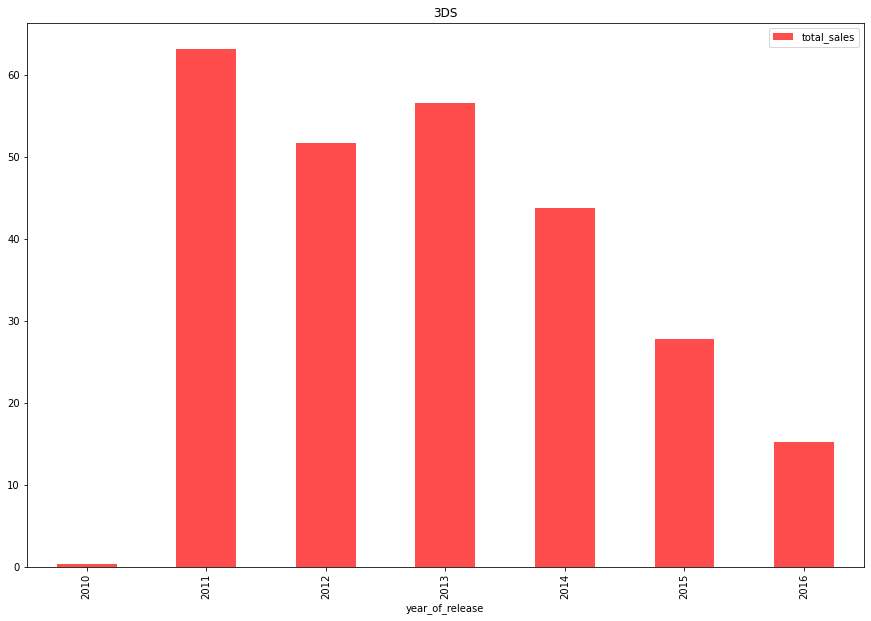

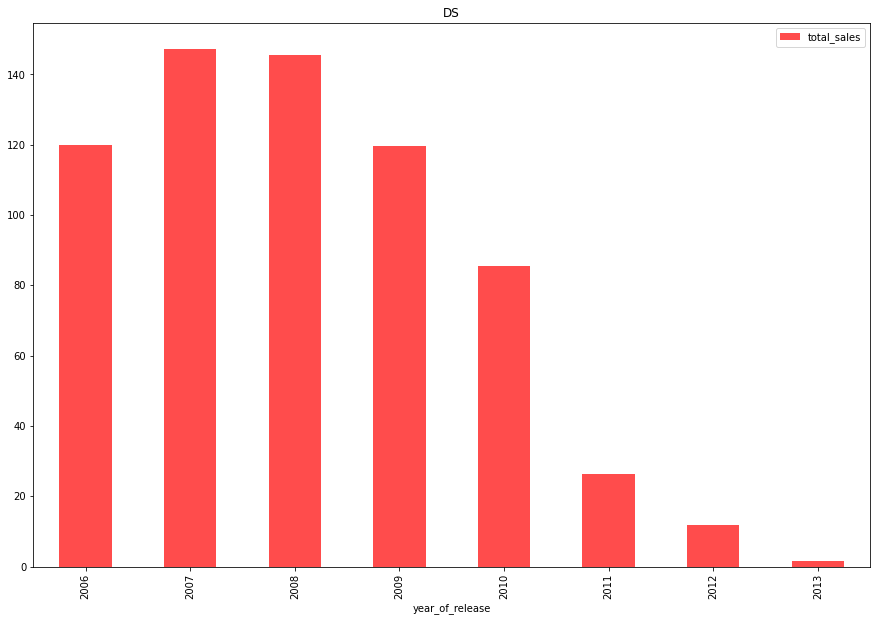

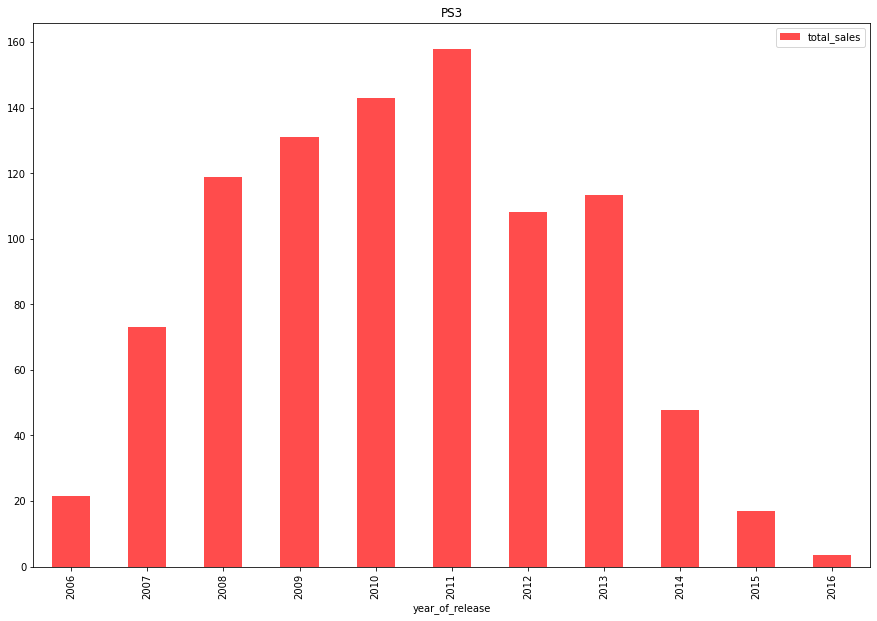

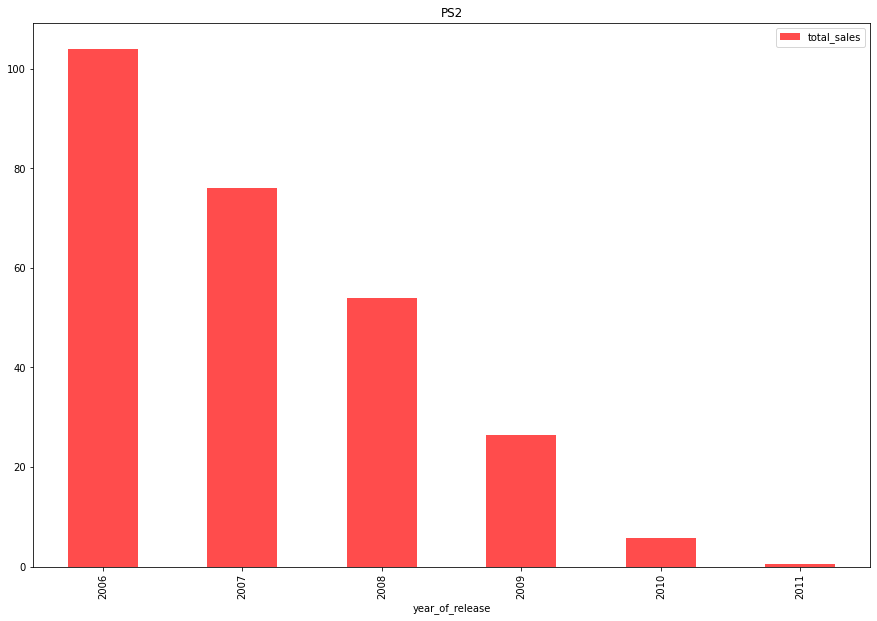

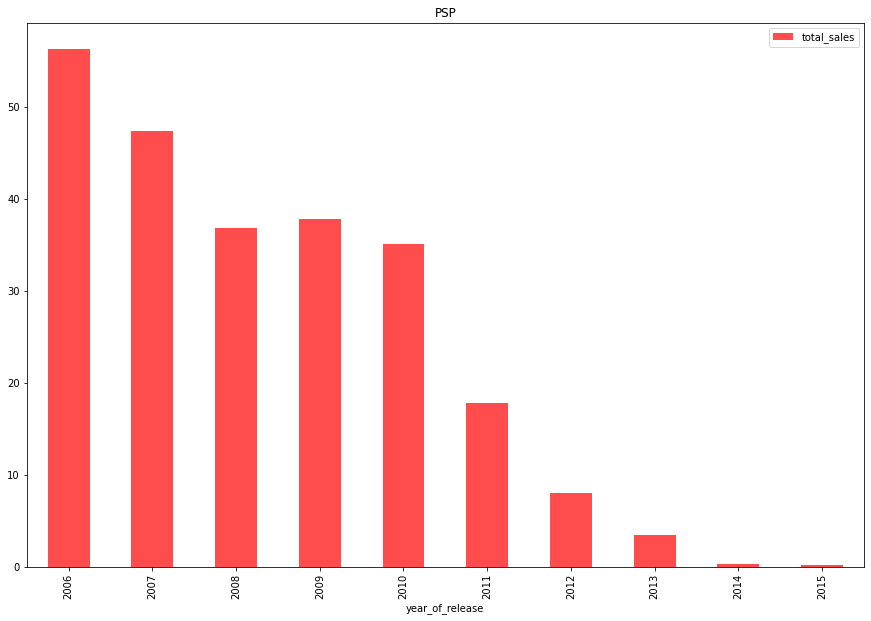

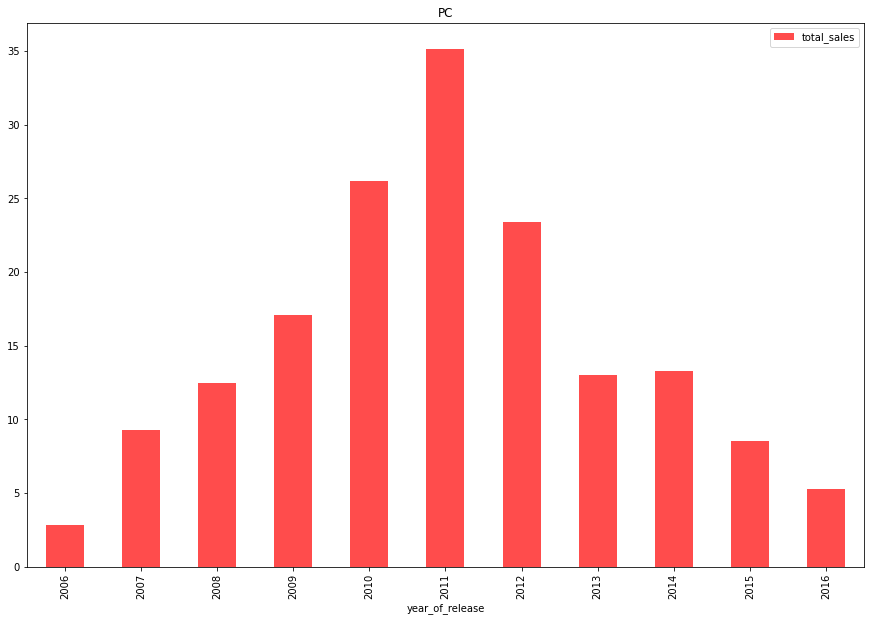

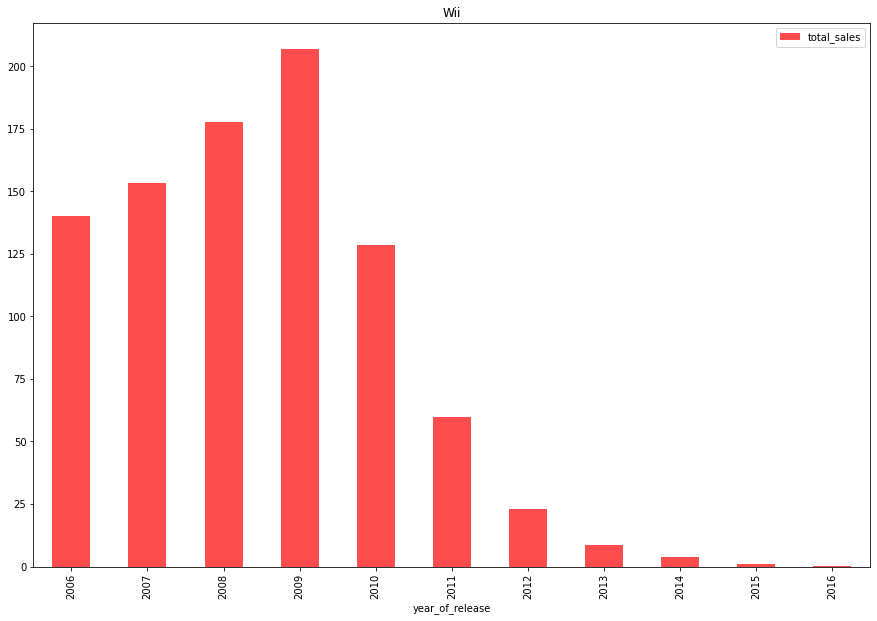

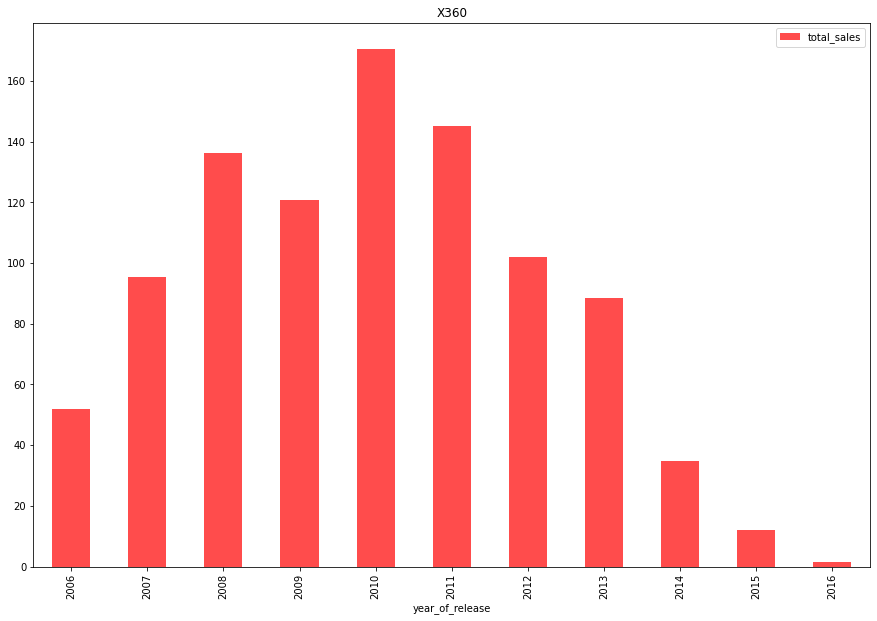

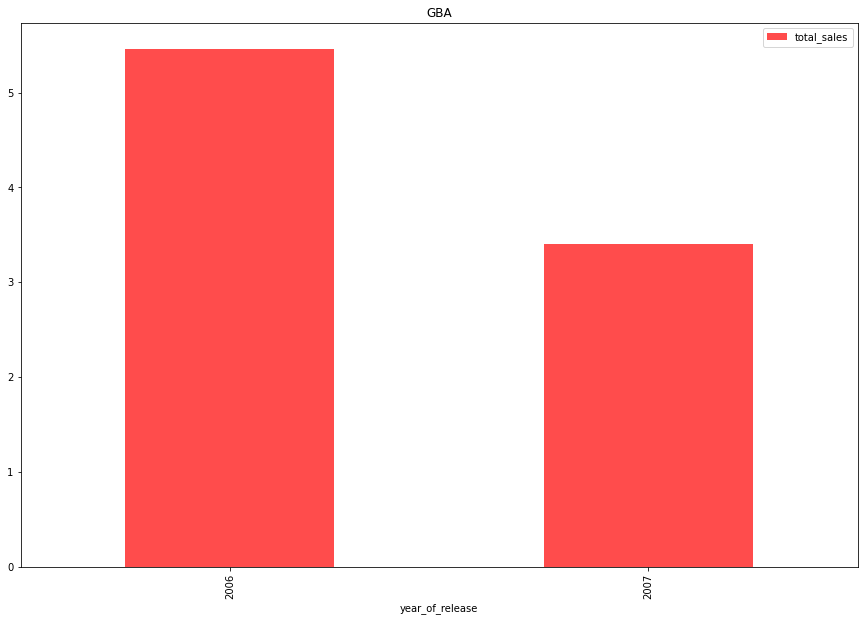

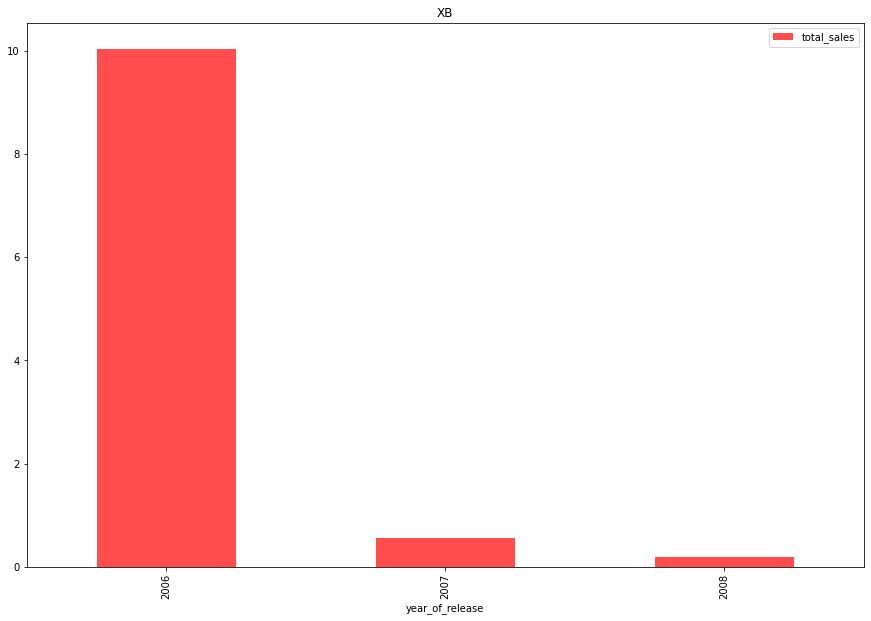

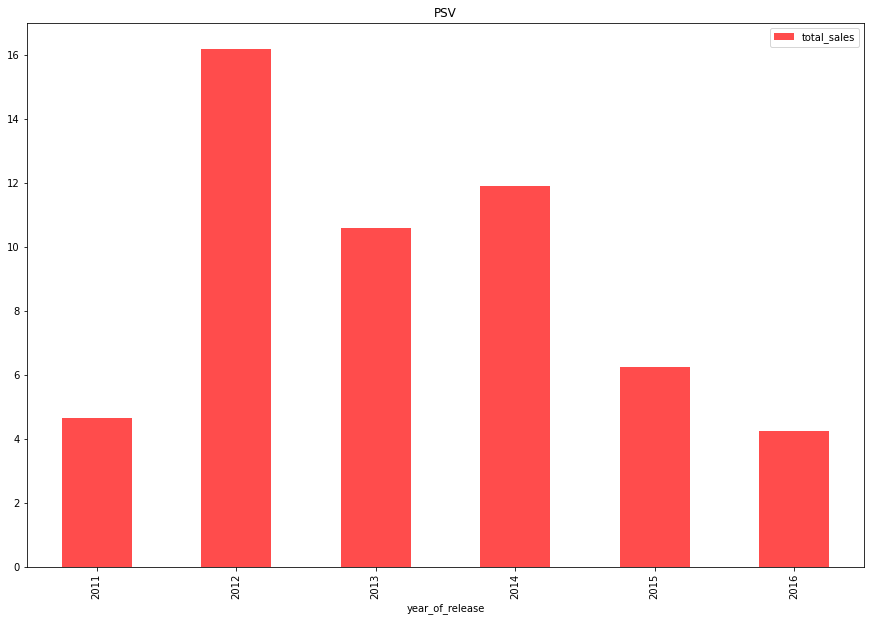

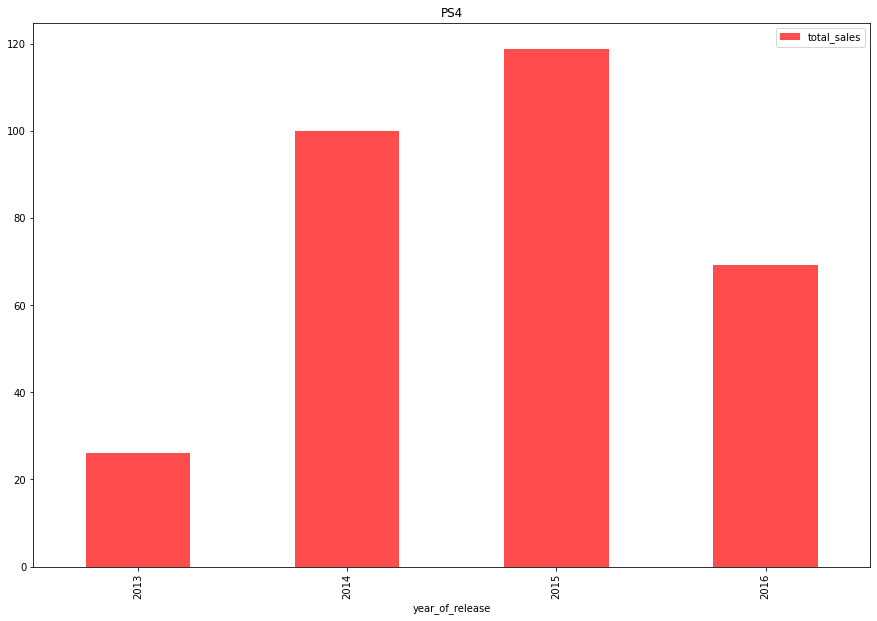

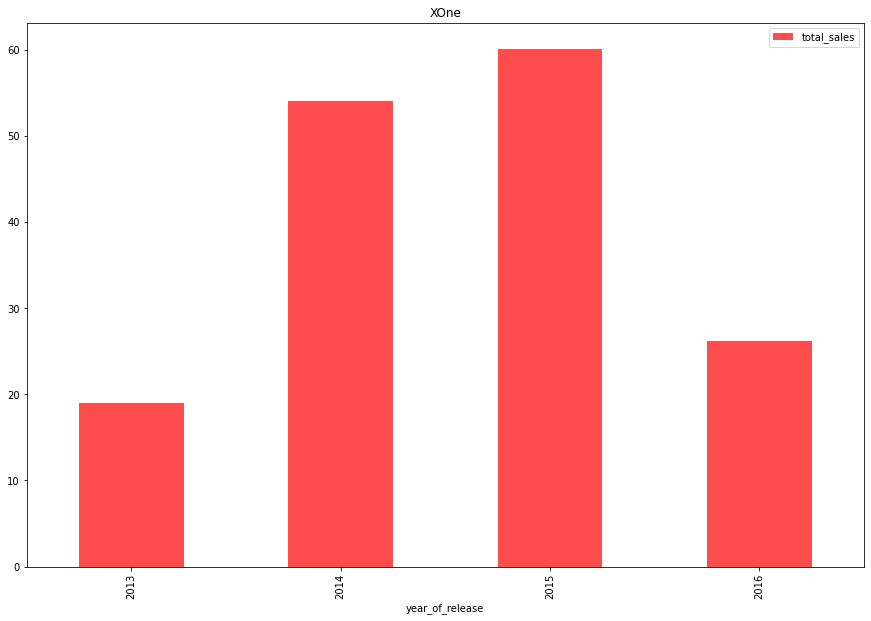

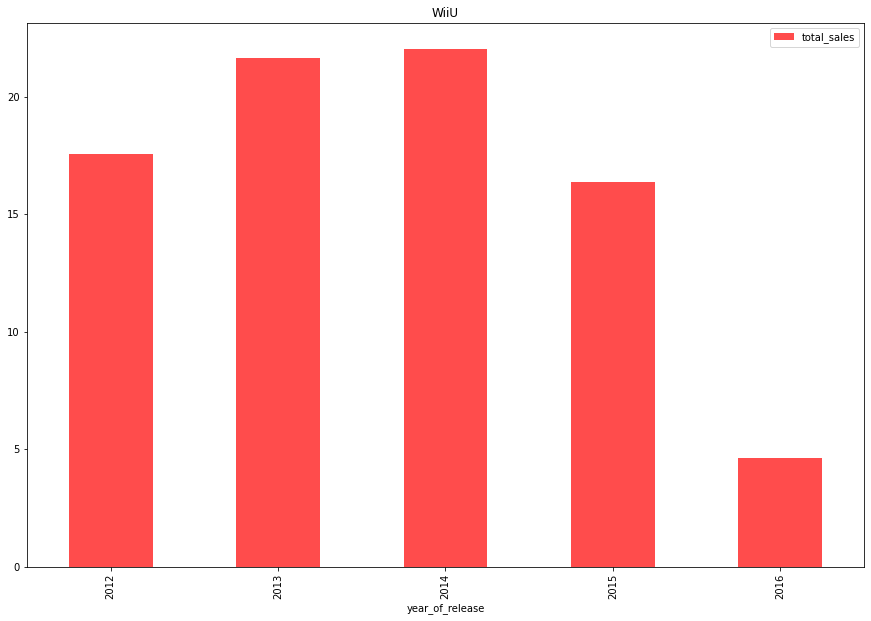

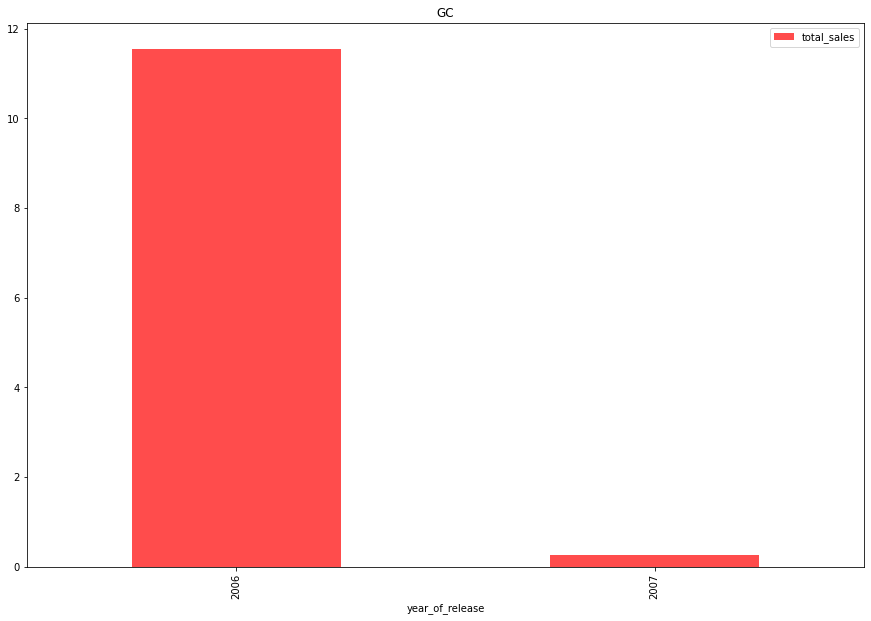

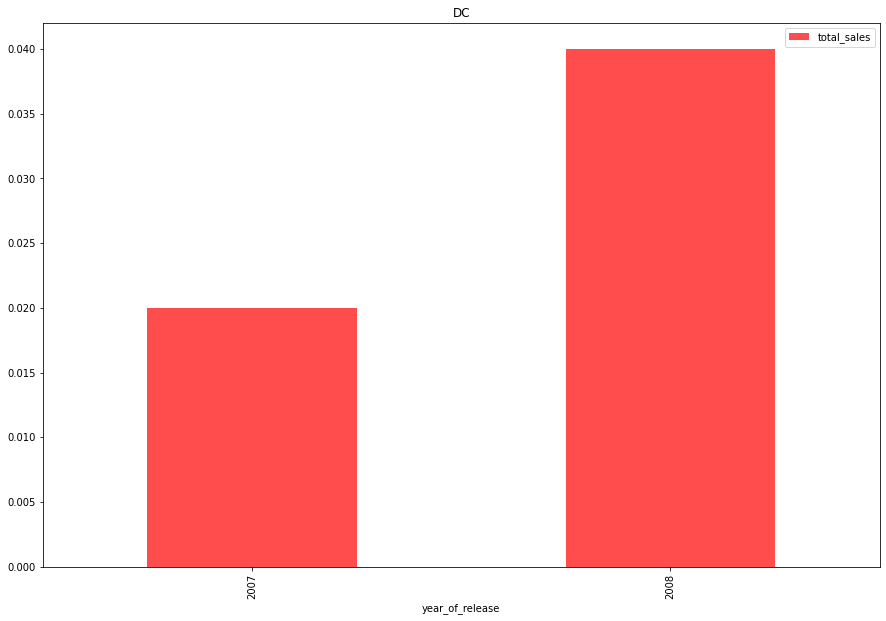

In [63]:
def plat_sales_year(platform):
    x = platform
    z = df2.query('platform == @x and year_of_release >= 2006').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot.bar(figsize=(15,10),
                                                                                color='red',
                                                                                alpha=0.7)
    plt.title(x)
    plt.show()
    return z
over_2006 = df2.query('year_of_release >= 2006')
over_2006 = over_2006['platform'].unique()
for x in over_2006:
    plat_sales_year(x)

Ya que tenemos las ventas de las plataformas de los ultimos 10 años podemos observar cuales aun continuan vendiendo titulos en pleno 2016 y cuales su ultimo año de venta de titulos ha sido ya hace varios años atras, por lo que podemos descartar plataformas y quedarnos con las platadormas que aun continuan con ventas  en el año 2016 las cuales son: **WiiU, XOne, PS4, PSV, X360, Wii, PC, PS3, 3DS**,sin embargo, tenemos plataformas que ya estan con valores muy bajos en cuanto a ventas lo que podemos decir que van a desaparecer que son: **X360, Wii, PS3**, por lo que las descartaremos y nos quedaremos solo con **WiiU, XOne, PS4, PSV, PC, 3DS** estas son las plataformas a analizar y ver cuales traen tendencia a la mejora y cuales estan por desaparecer.

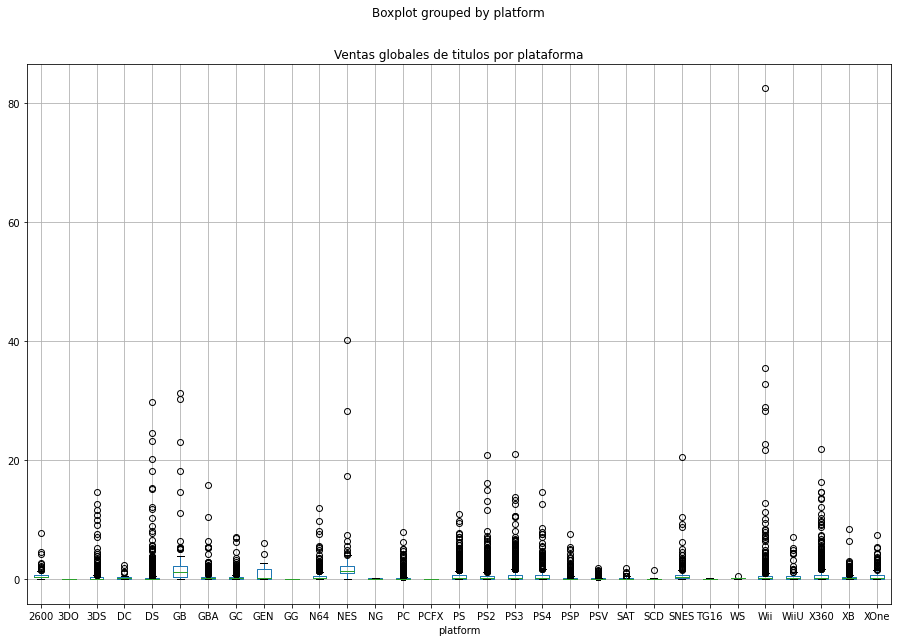

In [64]:
df2.boxplot(by='platform',
            column='total_sales',
            figsize=(15,10))
plt.title('Ventas globales de titulos por plataforma')
plt.show()

A simple vista podemos observar que es dificil saber los promedios de venta de todos los titulos por plataforma y de igual forma tenemos muchos valores alrededor de los 5 millones de usd, tendremos que reducir nuestro rango de ventas para observar mejor los diagramas

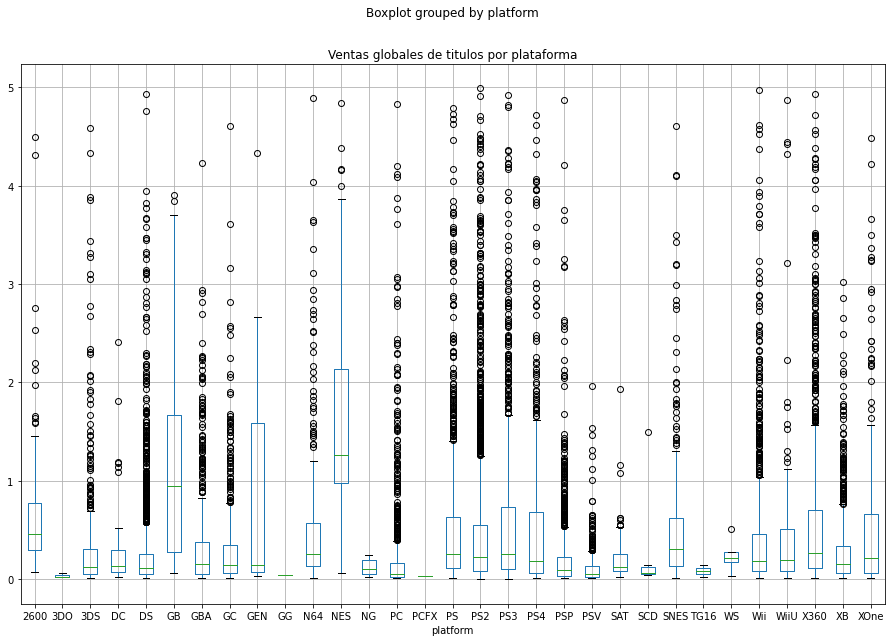

In [65]:
df2.query('total_sales < 5').boxplot(by='platform',
                                         column='total_sales',
                                         figsize=(15,10))
plt.title('Ventas globales de titulos por plataforma')
plt.show()

Simplificando nuestros datos para poder tener un mejor panorama vemos consolas que tienen valores muy altos en ciertos titulos, pero porque la media de esa consola es muy baja bueno podemos concluir que esa plataforma tiene demasiados titulos pero con ventas muy bajas como lo es **PC,PS2,X360,DS** y tabien podemos ver plataformas en las cuales la media es mas alta y sus titulos tienen valores muy similares como lo es **GB,GEN,NES**.\
Entonces que conlusion sacamos, pocos juegos mayores ventas, muchos juegos pocas ventas, y esto se puede deber a que si hay mayor competencia sera dificil vender todos los juegos de la misma forma. 

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

¡Muy buen trabajo con el análisis de gráficas!
</div>

### score en juegos

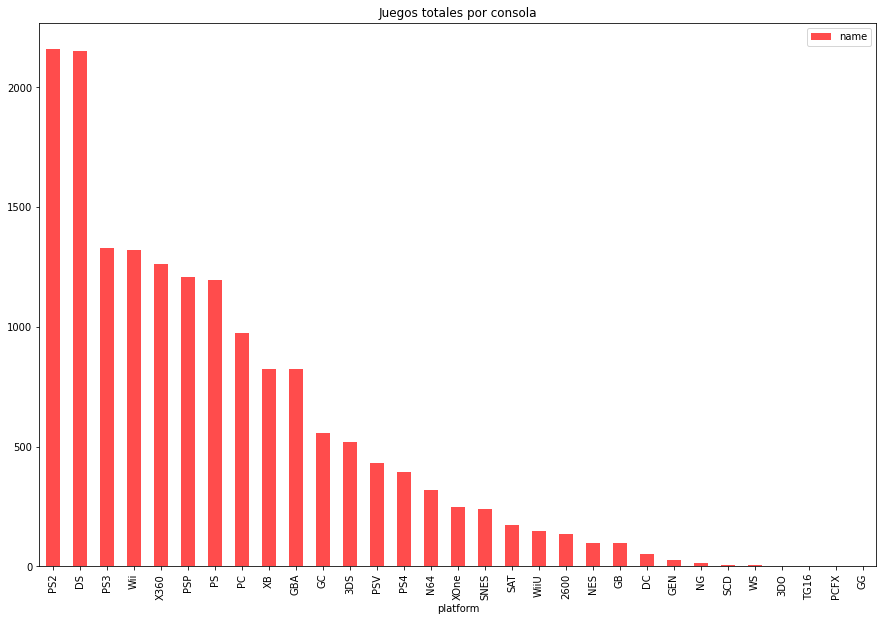

In [66]:
df2.pivot_table(index='platform',values='name',aggfunc='count').sort_values(by='name',ascending=False).plot.bar(figsize=(15,10),
                                                                                title= 'Juegos totales por consola',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

Analizaremos las consolas que habiamos anotado

In [67]:
pop_p = ['WiiU', 'XOne', 'PS4', 'PSV', 'X360', 'Wii', 'PC', 'PS3', '3DS']

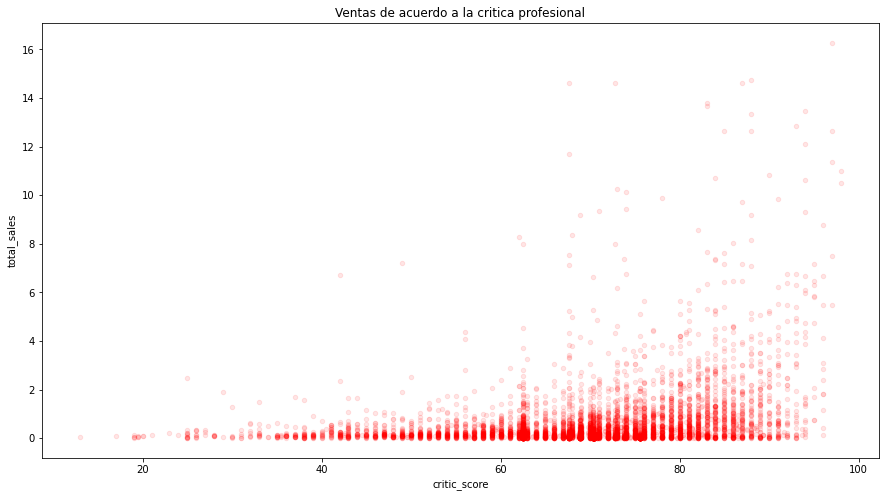

In [68]:
df2.query('platform in @pop_p and total_sales <20 and critic_score !=0').plot.scatter(x='critic_score',
                                            y='total_sales',
                                            figsize=(15,8),
                                            color='red',
                                            alpha=0.1)
plt.title('Ventas de acuerdo a la critica profesional')
plt.show()

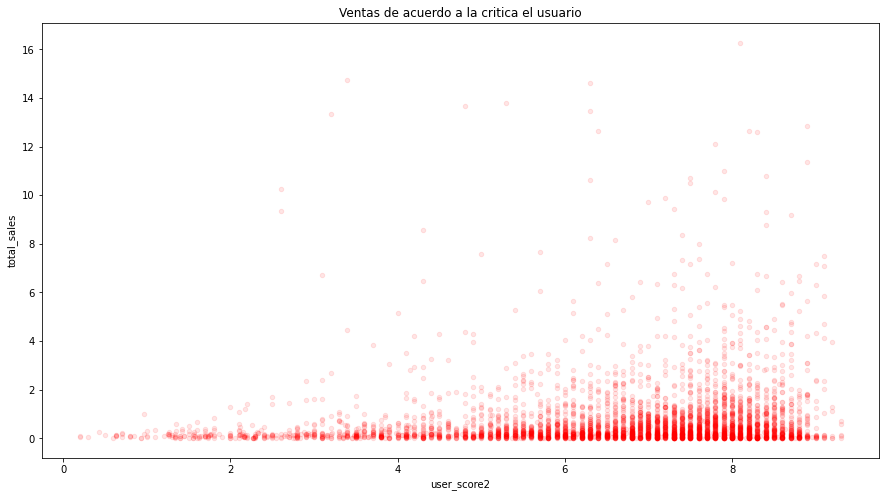

In [69]:
df2.query('platform in @pop_p and total_sales <20 and user_score2 !=0').plot.scatter(x='user_score2',
                                            y='total_sales',
                                            figsize=(15,8),
                                            color='red',
                                            alpha=0.1)
plt.title('Ventas de acuerdo a la critica el usuario')
plt.show()

A simple vista y quitando valores atopicos podemos decir que a mejor critica se pueden obtener mejores ventas, aunque tambien la critica buena no quiere decir que el juego pueda tener ventas altas ya que tenemos titulos con criticas bajas pero ventas iguales a un jeugo con criticas altas, aunque nuestro mapa nuestro grafico nos dice que la mayoria de titulos se concentran en criticas altas.

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido, se excluyeron en el analisis los valores que declaramos valor 0 y de igual forma se excluyeron en analisis anteriores para los valores en los campos que declaramos valores 0 
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Muy buen trabajo, pero estás usando los datos que se imputaron en 0. Dado que no sabemos que pudieron haber sido, se le está calificando bajo al juego a través de una imputación erronea.
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo!
</div>

#### Correlación entre reseñas y ventas

**Correlacion general**

In [70]:
df2.corr()

,eu_sales,jp_sales,na_sales,other_sales,critic_score,user_score2,year_of_release,total_sales
eu_sales,1.000000,0.435069,0.765424,0.723016,0.193443,0.151250,0.016391,0.901289
jp_sales,0.435069,1.000000,0.449638,0.291076,0.118573,-0.036353,0.008389,0.612295
na_sales,0.765424,0.449638,1.000000,0.638719,0.186364,0.136607,0.005915,0.941028
other_sales,0.723016,0.291076,0.638719,1.000000,0.177402,0.161322,0.013990,0.749346
critic_score,0.193443,0.118573,0.186364,0.177402,1.000000,0.257977,0.013615,0.205864
user_score2,0.151250,-0.036353,0.136607,0.161322,0.257977,1.000000,0.032589,0.133158
year_of_release,0.016391,0.008389,0.005915,0.013990,0.013615,0.032589,1.000000,0.011798
total_sales,0.901289,0.612295,0.941028,0.749346,0.205864,0.133158,0.011798,1.000000


Correlacion de las plataformas WiiU, XOne, PS4, PSV, X360, Wii, PC, PS3, 3DS

In [71]:
df2.query('platform in @pop_p').corr()

,eu_sales,jp_sales,na_sales,other_sales,critic_score,user_score2,year_of_release,total_sales
eu_sales,1.000000,0.495880,0.859179,0.946812,0.210688,0.149693,0.017143,0.953470
jp_sales,0.495880,1.000000,0.475072,0.457366,0.085434,0.021161,0.011356,0.585890
na_sales,0.859179,0.475072,1.000000,0.882205,0.194753,0.162036,0.010069,0.963890
other_sales,0.946812,0.457366,0.882205,1.000000,0.220787,0.166002,0.014881,0.947085
critic_score,0.210688,0.085434,0.194753,0.220787,1.000000,0.303470,0.029403,0.207831
user_score2,0.149693,0.021161,0.162036,0.166002,0.303470,1.000000,0.022775,0.155824
year_of_release,0.017143,0.011356,0.010069,0.014881,0.029403,0.022775,1.000000,0.014200
total_sales,0.953470,0.585890,0.963890,0.947085,0.207831,0.155824,0.014200,1.000000


Podemos ver que la correlacion en mayor en ambos casos para la critica profesional, aunque no tiene una correlacino directa, la critica profesional influye mas en las ventas totales que una critica del usuario, porque?, bueno podemos decir que una critica profesional es imparcial y contiene detalles mas especificos y con mas expeeriencia, mientras que un usuario normal, solo describe si le gusta o no el juego y le otorga una calificacion. 

### Juegos por genero 

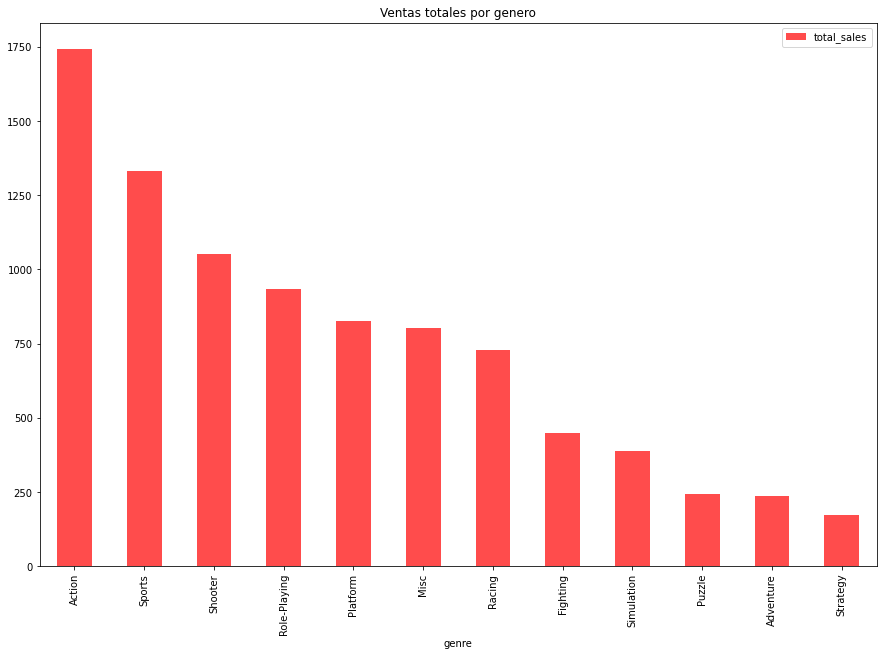

In [72]:
df2.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales por genero',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

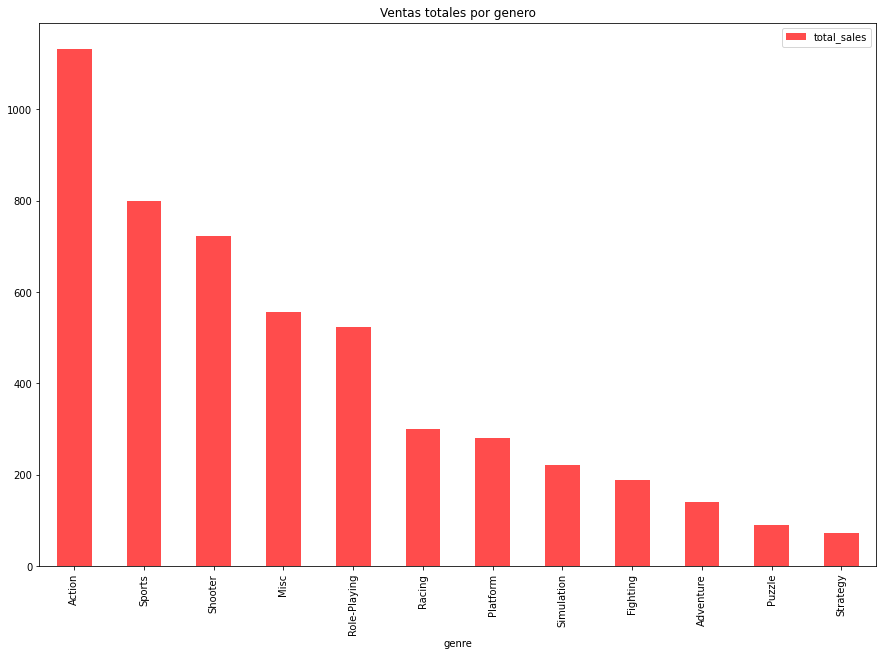

In [73]:
df2.query('year_of_release >= 2006').pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).plot.bar(figsize=(15,10),
                                                                                title= 'Ventas totales por genero',
                                                                                color='red',
                                                                                alpha=0.7)
plt.show()

En cuestion del genero podemos decir que el top 3 de ventas a traves de los años ha sido Action, Sports, Shooter con ventas de mas de mil millones de usd en cada genero, mientras que los generos mas vendidos de los ultimos 10 años son los mismos con ventas de mas de 600 millones de usd.\ 

Mientras que los generos de Strategy, Puzzle y adventura son los menos vendidos, tal vez sera porque su mecanica de juego o el objetivo principal del juego no es el mas atractivo 

Por lo que podemos decir que el genero si es un factor importante a la hora de la planeacion de la realizacion de un juego para un nuevo lanzamiento.

## Perfil de cada region 

Las regiones que tenemos para analizar son: na_sales - Norteamérica , eu_sales - Europa, jp_sales - Japón , other_sales - otros paises

In [74]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

In [75]:
def sales_country(data,category):
    for x in regions:
        data.pivot_table(index=category,values=x,aggfunc='sum').sort_values(by=x,ascending=False).plot.bar(figsize=(15,10),
                                                                                                            color='red',
                                                                                                            alpha=0.7)
        plt.title(x)
        plt.show()

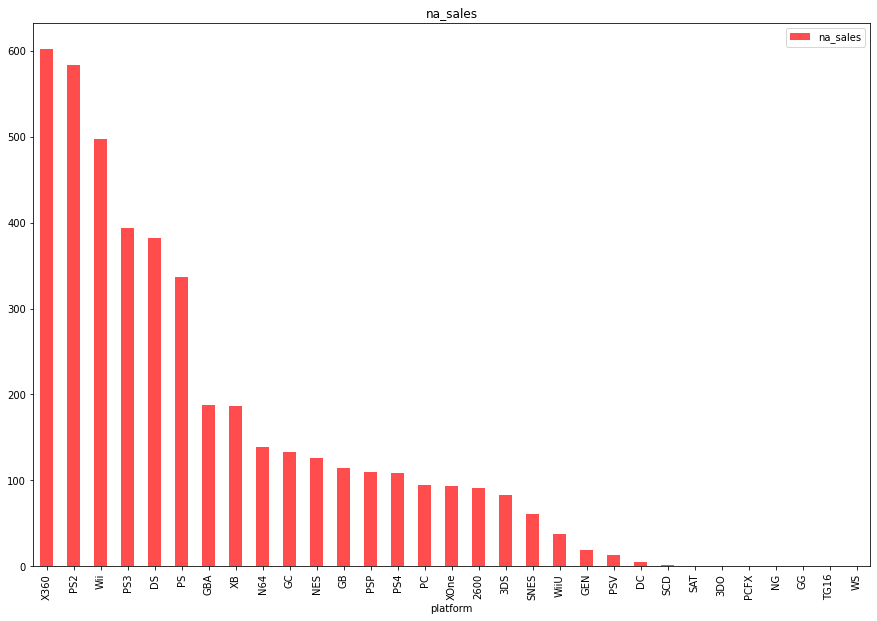

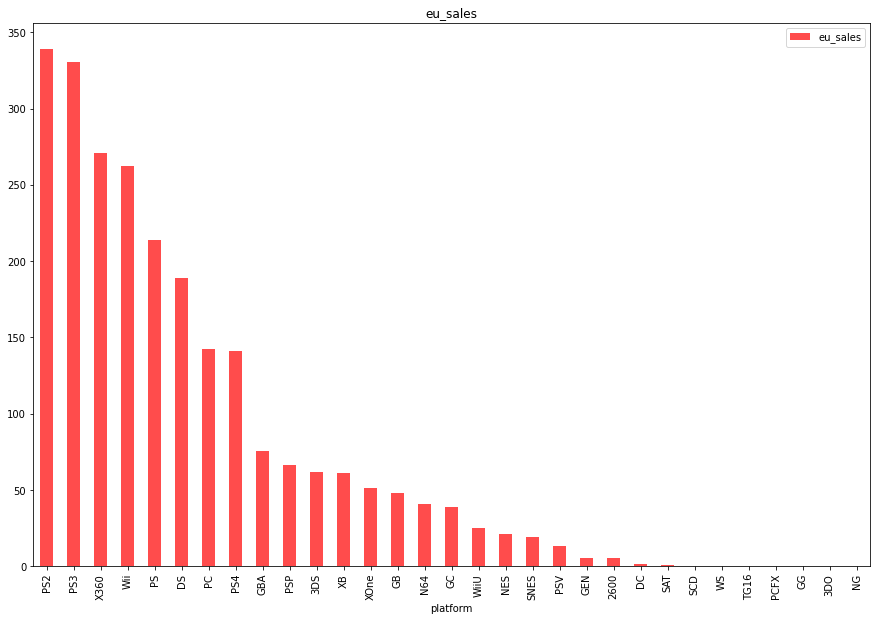

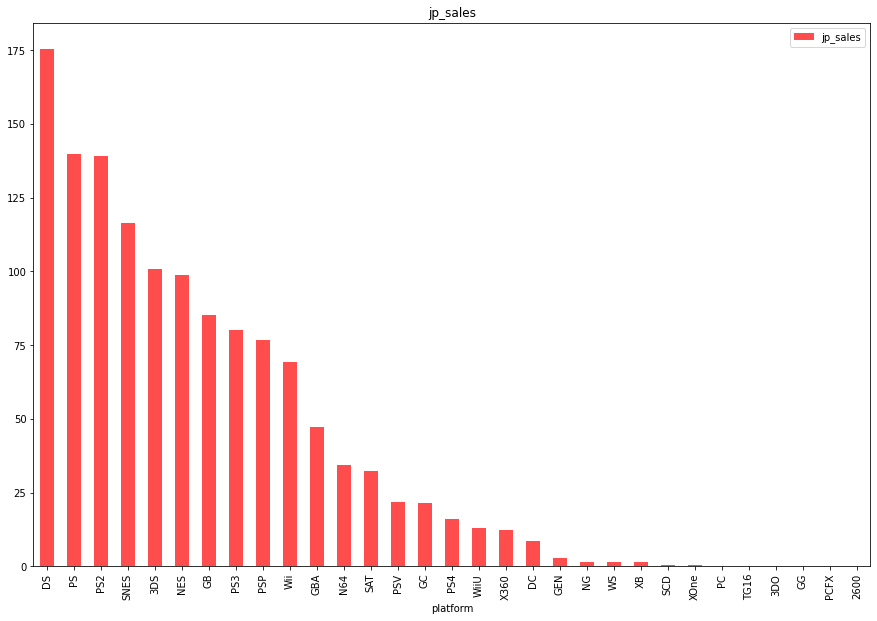

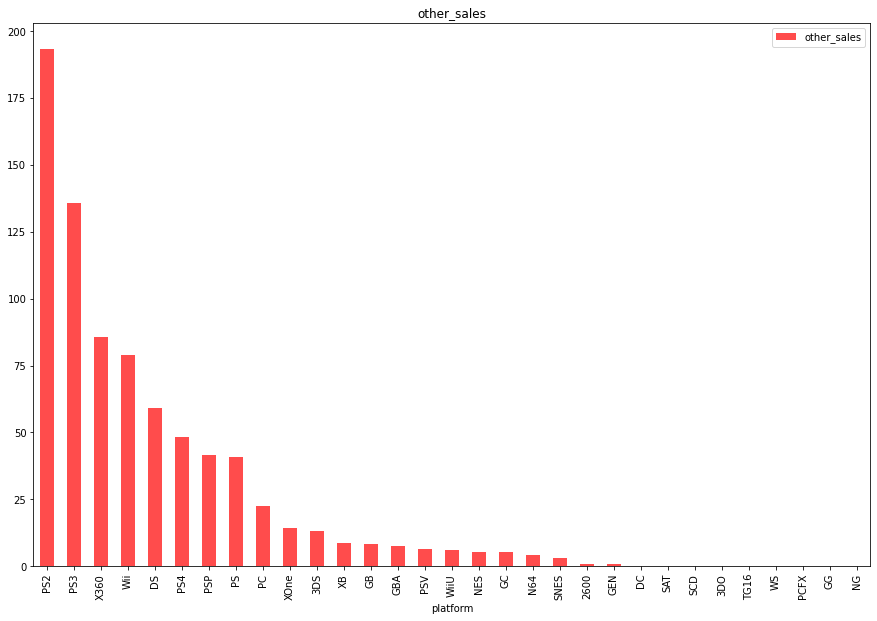

In [76]:
sales_country(df2,'platform')

Tenemos las 5 consolas principales en ventas en las diferentes regiones a traves de los años:  
Norteamerica: X360, PS2, Wii, PS3, DS  
Europa: PS2, PS3, X360, Wii, PS  
Japon: DS, PS, PS2, SNES, 3DS  
Otras: PS2, PS3, X360, Wii, DS  
Comparemos las ventas de estas consolas entre regiones


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Buen trabajo!
</div>

###  Ventas por consolas populares en las diferentes regiones

In [77]:
plat_pop = ['X360','PS2','Wii','PS3','DS','PS','SNES','3DS']

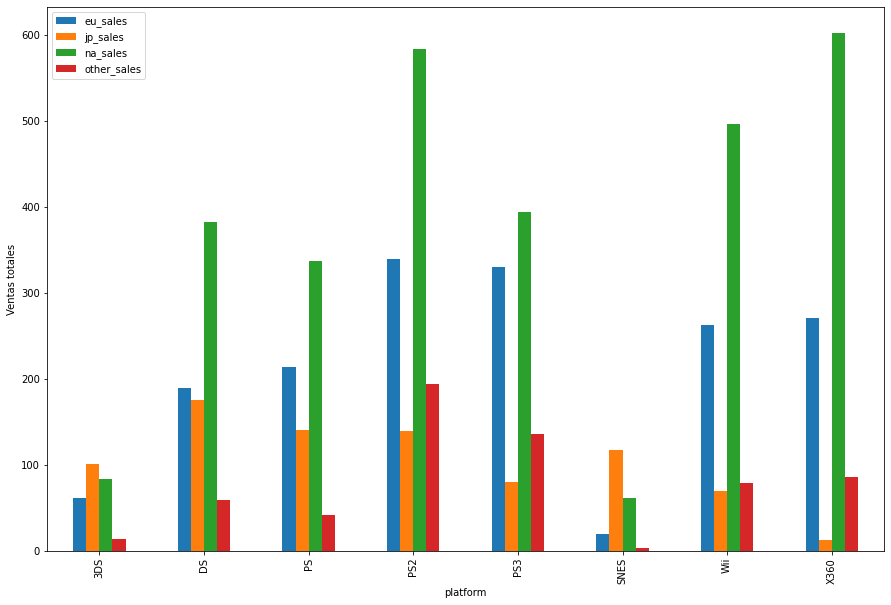

In [78]:
df2.query('platform in @plat_pop').pivot_table(index='platform',values=regions,aggfunc='sum').plot.bar(figsize=(15,10))
plt.ylabel('Ventas totales')
plt.show()

Podemos ver que Japon es la region con mas ventas de titulos de 3DS y SNES, mientras que Norteamerica es lider en ventas de consolas populares seguido por europa.

Al parecer las consolas no son muy populares en japon ya que sus ventas de titulos rondas los 100 millones de usd, mientras que norteamerica tiene la mayor parte del mercado con ventas de titulos de mas de 500 millones de usd

### Ventas por genero mas popular

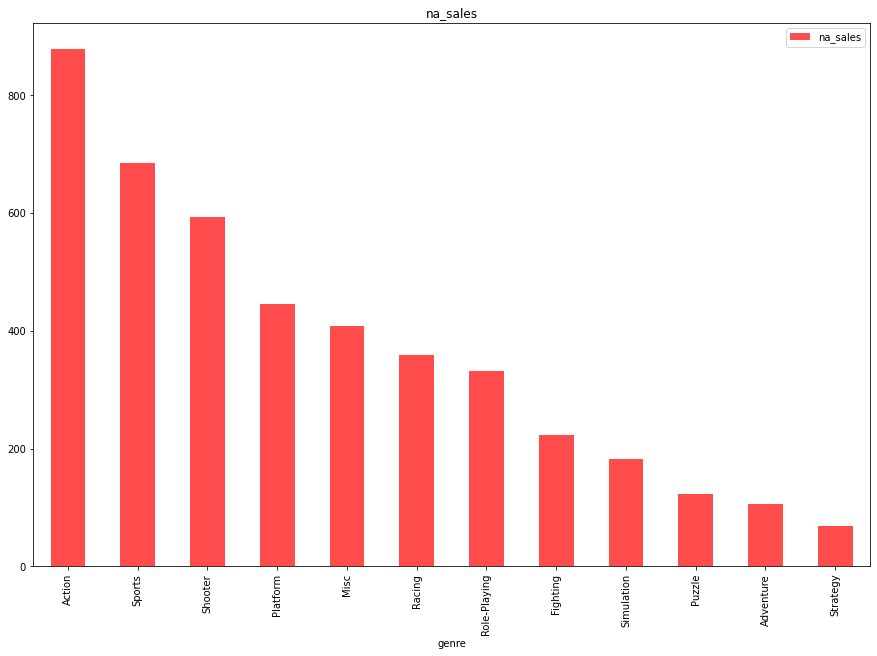

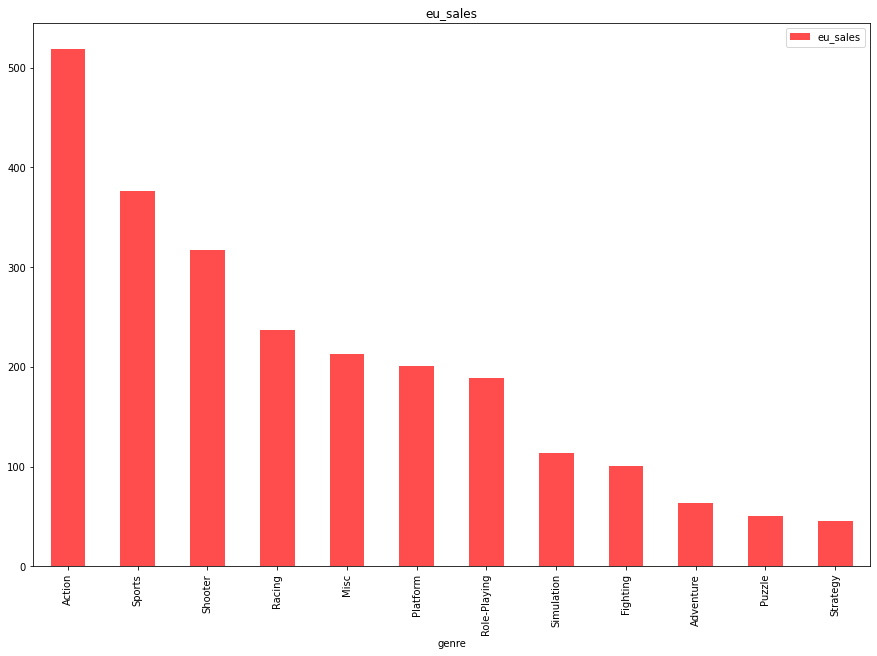

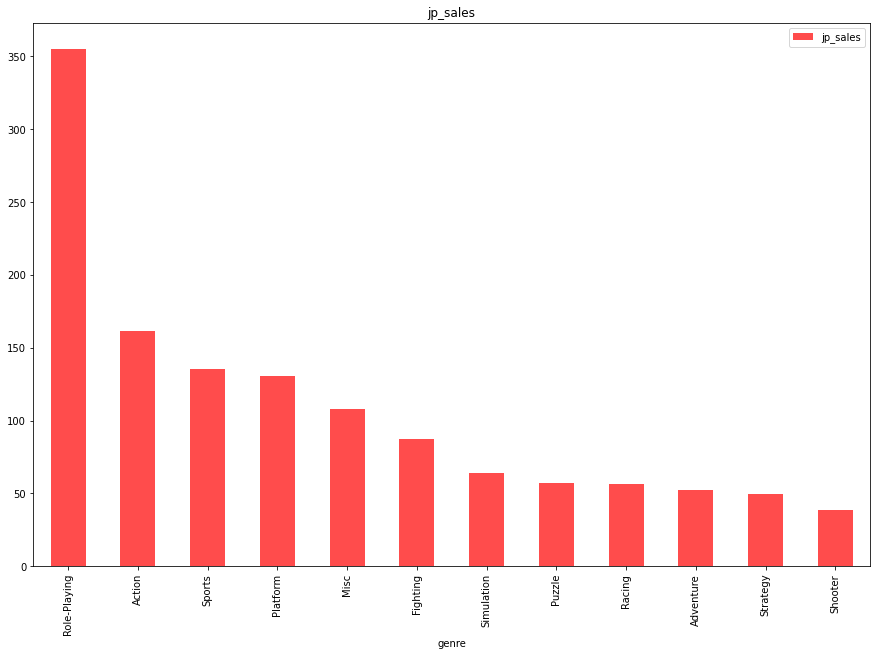

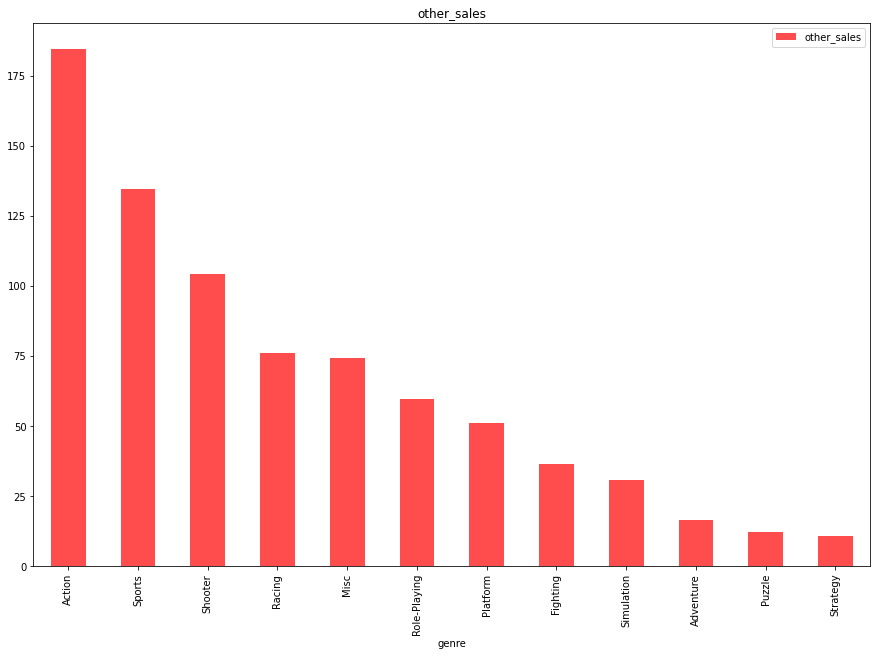

In [79]:
sales_country(df2,'genre')

Tenemos los 5 generos principales en ventas en las diferentes regiones a traves de los años:  
Norteamerica: Action, Sports, Shooter, Platform, Misc  
Europa: Action, Sports, Shooter, Racing, Misc
Japon: Role_playing, Action, Sports, Platform, Misc
Otras: Action, Sports, Shooter, Racing, Misc
Comparemos las ventas de estas consolas entre regiones


In [80]:
genre_pop = ['Action','Sports','Shooter','Platform','Misc','Racing','Role_playing']

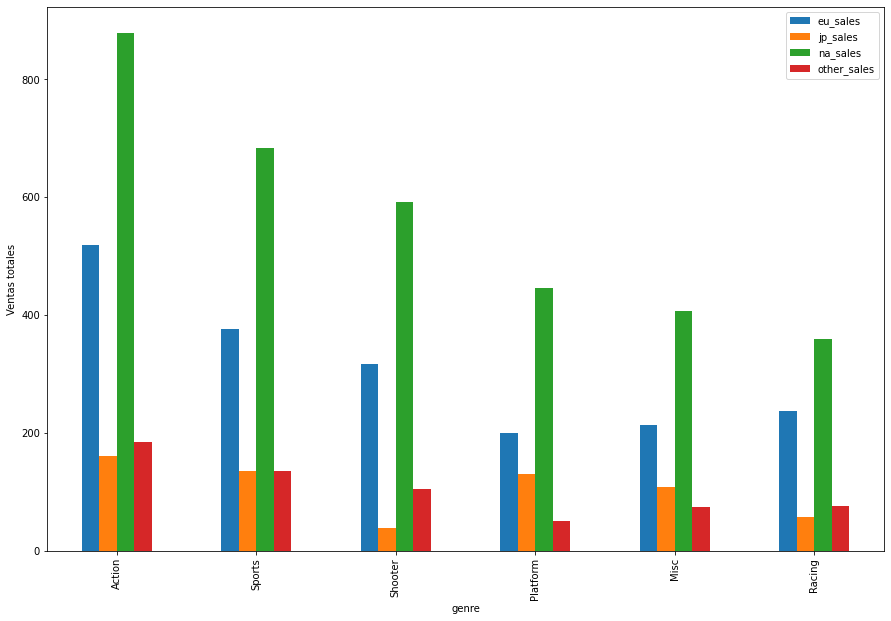

In [81]:
df2.query('genre in @genre_pop').pivot_table(index='genre',values=regions,aggfunc='sum').sort_values(by=regions,ascending=False).plot.bar(figsize=(15,10))
plt.ylabel('Ventas totales')
plt.show()

Podemos ver que en cuanto a los 5 generos mas vendidos por region, tenemos dos regiones que abarcan la mayor parte del mercado, norteamerica y europa.  
Ahora a simple vista podemos observar que las ventas de Norteamerica son aproximadamente las mismas que las regiones de europa, japon y otras juntas, norteamerica domina el mercado.  
Y por ultimo el genero mas vendido es el de action, seguido por sports y en tercer lugar los shooter.

### Ventas por rating mas popular

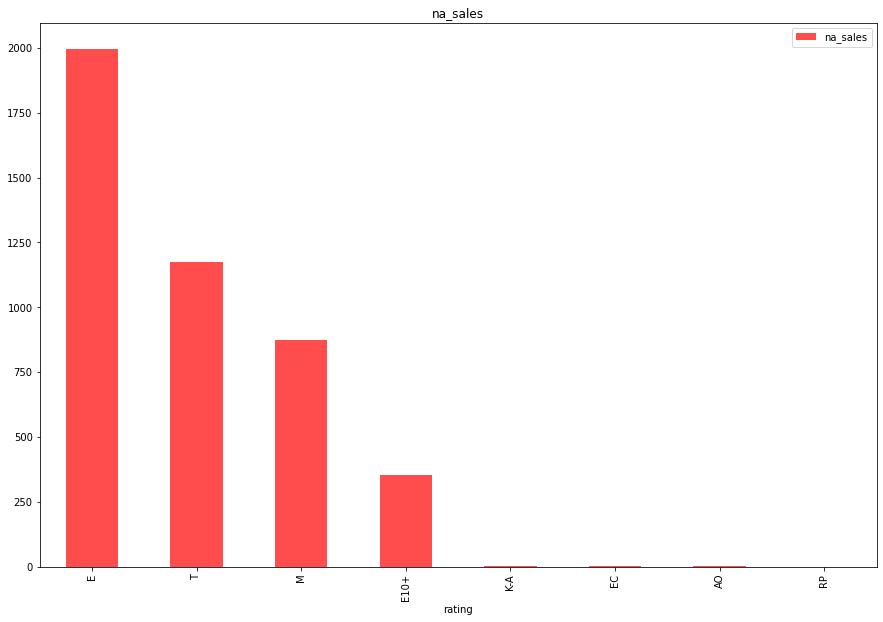

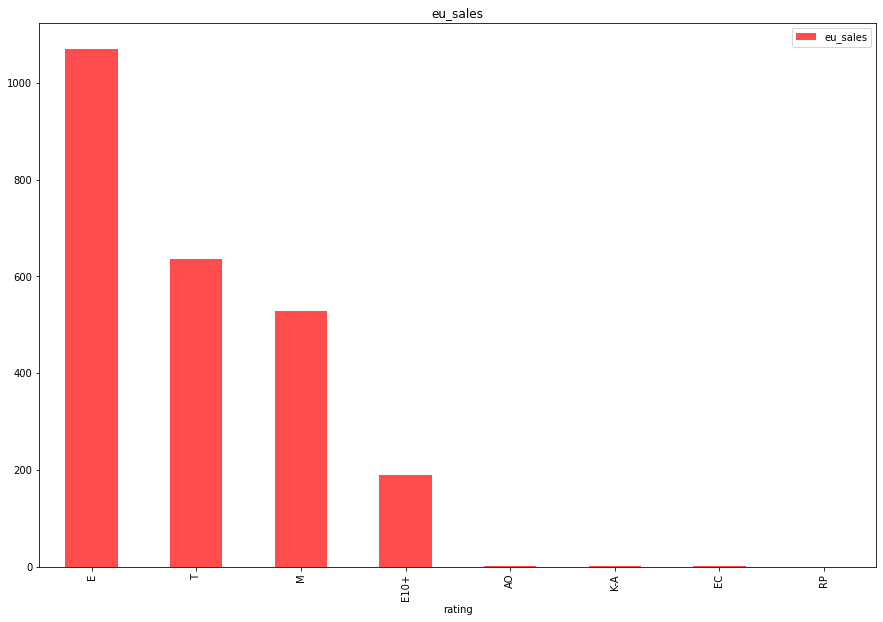

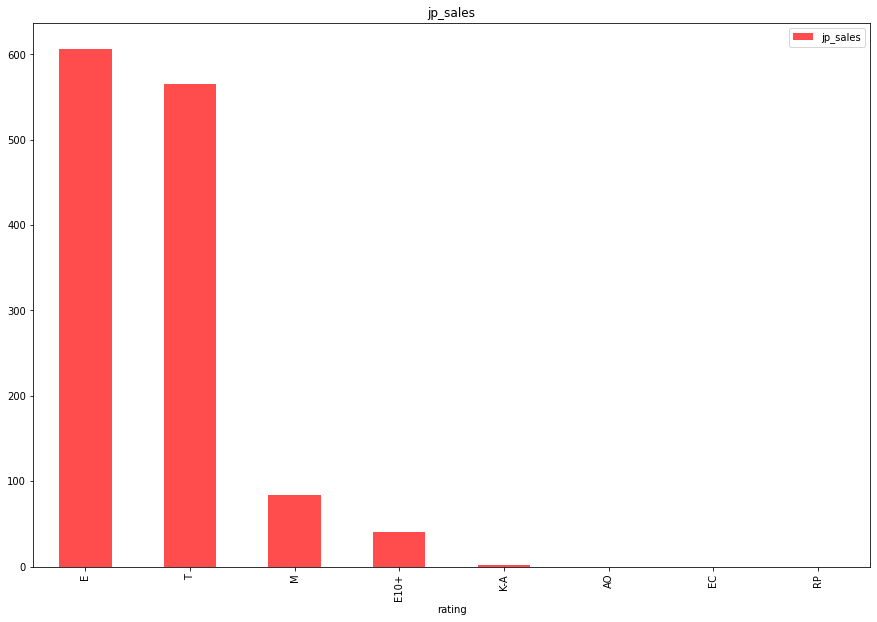

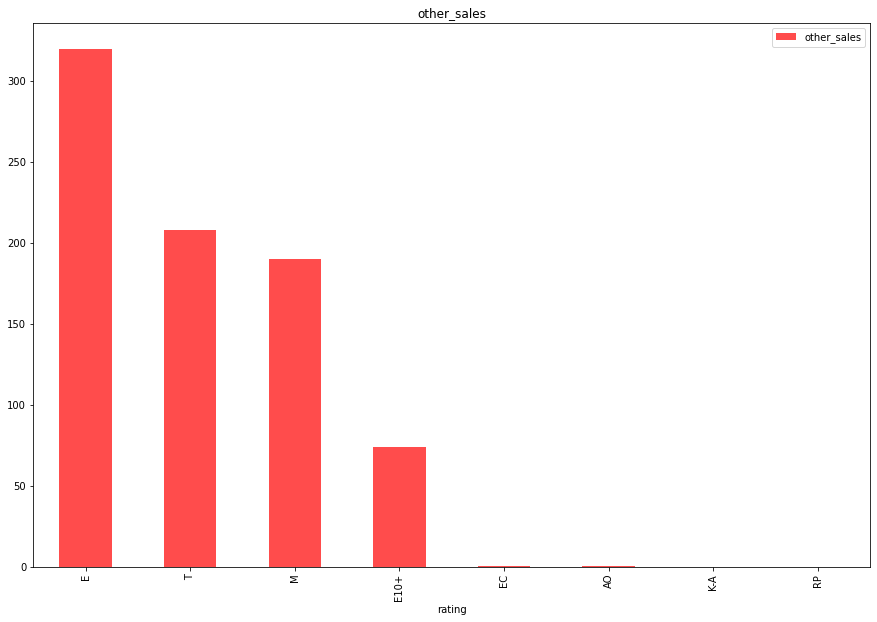

In [82]:
sales_country(df2,'rating')

Facilmente podemos apreciar que el genero con mas ventas en las 4 regiones es E o clasificado para todos, seguido de T para mayores de 13 años y M para Mayores de 17 años.

Por lo que podemos concluir que la clasificacion E o para todas las edades es la mas rentable en cualquier región.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Buen trabajo!
</div>

## Hipotesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Veamos si la calificacion promedio de las criticas de xbox one y pc son las mismas, para esto necesitamos las muestras de cada categoria y las pondremos a prueba, revisaremos los dos tipos:
* la critica de usuario
* la critica de profesionales

In [83]:
# H0 Las calificaciones promedio son iguales
# H1 Las calificaciones promedio no son iguales

# Establecemos nuestro valor de tolerancia
alpha = 0.05 

results = st.ttest_ind(df2.query('platform == "XOne" and user_score2 != 0')['user_score2'], df2.query('platform == "PC" and user_score2 != 0')['user_score2'],equal_var=False) 
print('p-value:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 3.072705996162076e-06
Rechazamos la hipótesis nula


Observamos que el valor p es sumamente bajo aprox 0.0000003 % por lo que nos dice que la probabilidad de que las cantidades promedio de las dos muestras de la critica de usuario de xbox one y pc sean iguales.

In [84]:
# H0 Las calificaciones promedio son iguales
# H1 Las calificaciones promedio no son iguales

# Establecemos nuestro valor de tolerancia
alpha = 0.05 

results = st.ttest_ind(df2.query('platform == "XOne" and critic_score != 0')['critic_score'], df2.query('platform == "PC" and critic_score != 0')['critic_score'],equal_var=False) 
print('p-value:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.02600501412192614
Rechazamos la hipótesis nula


Observamos que el valor p es de  2.6% por lo que nos dice que la probabilidad de que las cantidades promedio de las dos muestras de la critica de usuario de xbox one y pc sean iguales es nula.

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido y se excluyeron los valores que imputamos como 0 para evitar un resultado erroneo, ya que afectaba el resultado de la probabilidad, mismo caso para el ejercicio de abajo
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Buen trabajo con las pruebas, puedes optmizar el código pasandole de una vez a cada prueba la información de la columna sin crear muchas variables, por ejemplo: 
    
`results = st.ttest_ind(df2.query('platform == "PC"')['critic_score'], df2.query('platform == "XOne"')['critic_score'],equal_var=False)`
    
Aplica para las dos pruebas, te ahorrará código y organización
</div>

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Veamos si la calificacion promedio de los usuarios para los titulos de geneo de accion y deportes son las mismas, para esto necesitamos las muestras de cada categoria y las pondremos a prueba, revisaremos los dos tipos:
* la critica de usuario
* la critica de profesionales

In [85]:
# H0 Las calificaciones promedio son iguales
# H1 Las calificaciones promedio no son iguales

# Establecemos nuestro valor de tolerancia
alpha = 0.05 

results = st.ttest_ind(df2.query('genre == "Action" and user_score2 != 0')['user_score2'], df2.query('genre == "Sports" and user_score2 != 0')['user_score2'],equal_var=False) 
print('p-value:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 4.1615154677506033e-05
Rechazamos la hipótesis nula


Observamos que el valor p es bajo aprox 0.02 % por lo que la probabilidad de que las cantidades promedio de las criticas de usuario de los generos de accion y deportes sean iguales es nula.

In [86]:
# H0 Las calificaciones promedio son iguales
# H1 Las calificaciones promedio no son iguales

# Establecemos nuestro valor de tolerancia
alpha = 0.05 

results = st.ttest_ind(df2.query('genre == "Action" and critic_score != 0')['critic_score'], df2.query('genre == "Sports" and critic_score != 0')['critic_score'],equal_var=False) 
print('p-value:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 5.5570688470739355e-18
Rechazamos la hipótesis nula


Observamos que el valor p es sumamente bajo por lo que nos dice que la probabilidad de que las cantidades promedio de las dos muestras de la critica profesional de los generos de accion y deportes es nula.

Para formular nuestras hipotesis utilizamos nuestro valor de alpha de 0.05 o 5% ya que son los valores convencionales, separamos nuestras muestras de acuerdo a la categoria necesaria y las comparamos de acuerdo a las criticas de usuario y criticas profesionales para comprobar si ademas ser nula o verdadera la hipotesis, podemos ver que tan lejos estan los valores entre criticas de usuario y criticas profesionales.

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregido
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Aplica lo mismo del comentario de arriba
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo!
</div>

## Conclusion


1. Identificamos que datos tenemos, el tipo de datos, si tenemos valores ausentes, valores duplicados y valores unicos, esto para tener un panorama de que nos enfrentamos y poder resolverlo.

2. Verificamos los valores ausentes, en este caso realizamos el llenado de valores siguiendo ciertos criterios: llenando primero valores de acuerdo a sus valores ya existentes en caso de los titulos que hay en diferentes plataformas, despues procedimos a llenar valores de acuerdo al promedio de la categoria en general de acuerdo a la columna.

3. Una vez los datos ya limpios, comenzamos a realizar los graficos para poder analizar los valores de las diferentes categorias, ya sea de forma global o de forma especifica y de igual forma poder realizar las comparaciones, para este caso usamos mucho las graficas de barras y graficos de dispercion, con estos graficos se puede observar las comparaciones entre categorias de forma mas facil.

4. Las hipotesis las formulamos de acuerdo la conclusion si o no, o se cumple o no, usamos la hipótesis sobre la igualdad de las medias de dos poblaciones, porque aunque usamos el mismo dataframe las muestras se dividen por categoria y asi podemos comprobar si son parecidas o no.

De esta forma pudimos realizar los analisis de datos de este proyecto y llegar a la conclusion que las consolas con futuro para el año 2017 son WiiU, XOne, PS4, PSV, PC, 3DS; ya que como vimos el tiempo de vida de las consolas es de 10 años, las otras consolas no mencionadas su tiempo de vida a llegado a su fin, ya no tienen ventas en el año 2016 y estas 6 consolas aun comienzan su incursion en el mercado (a excepcion de PC ya que no se podria considerar consola ya que una pc se puede actualizar *un caso especial*), asi que el foco de atencion es a estas consolas, de igual forma de acuerdo a los datos estadisticos, seria enfocarnos en promover o insistir en la realizacion de juegos de genero de accion, deportes, shooter ya que son los juegos que mas ventas tienen y de igual forma que sean de rating E para todas las edades en el caso de deportes y accion y M para mas de 17 años en caso de los shooters.


<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Corregidos
</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Muy buen trabajo en general, te dejé un par de comentarios. Pero seguro no tendras problemas corrigiendolos. 
    
Saludos Rafael!
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>
Muy buen trabajo Rafael! 
Felicitaciones por aprobar todos los puntos del proyecto y hacer las correcciones. 
Saludos!
</div>